In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.float_format",lambda x : "%.5f" %x)

In [3]:
from warnings import filterwarnings
filterwarnings("ignore" , category=FutureWarning)
filterwarnings("ignore" , category=DeprecationWarning)

In [4]:
path = '/Users/gokhanersoz/Desktop/Project/ieee-fraud-detection/'

In [5]:
%%time

# Transaction : İşlem
# İdentity : Kimlik

train_transaction = pd.read_csv(f"{path}train_transaction.csv")
train_identity = pd.read_csv(f"{path}train_identity.csv")

test_transaction = pd.read_csv(f"{path}test_transaction.csv")
test_identity = pd.read_csv(f"{path}test_identity.csv")

CPU times: user 18.8 s, sys: 3.74 s, total: 22.6 s
Wall time: 23.1 s


In [6]:
train = pd.merge(train_transaction, train_identity, on = "TransactionID" , how = "left")
test =  pd.merge(test_transaction , test_identity , on = "TransactionID" , how = "left")

In [7]:
del train_transaction,train_identity, test_identity,test_transaction

In [8]:
print("Train Shape : {}".format(train.shape))
print("Test Shape : {}".format(test.shape))

Train Shape : (590540, 434)
Test Shape : (506691, 433)


In [9]:
train.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50000,W,13926,NaN,150.00000,discover,142.00000,credit,315.00000,87.00000,19.00000,NaN,NaN,NaN,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,2.00000,0.00000,1.00000,1.00000,14.00000,NaN,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,13.00000,13.00000,NaN,NaN,NaN,0.00000,T,T,T,M2,F,T,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,117.00000,0.00000,0.00000,0.00000,0.00000,0.00000,117.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [10]:
test.head(3)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663549,18403224,31.95000,W,10409,111.00000,150.00000,visa,226.00000,debit,170.00000,87.00000,1.00000,NaN,gmail.com,NaN,6.00000,6.00000,0.00000,0.00000,3.00000,4.00000,0.00000,0.00000,6.00000,0.00000,5.00000,1.00000,115.00000,6.00000,419.00000,419.00000,27.00000,398.00000,27.00000,NaN,NaN,NaN,NaN,418.00000,203.00000,NaN,NaN,NaN,409.00000,T,T,F,NaN,NaN,F,T,T,T,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,47.95000,0.00000,0.00000,47.95000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

##  EDA

**reference** : https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203

**

``TranscationDT``:

Belirli bir referans tarih saatinden Timedelta (Gerçek bir zaman damgası değil !!!!)

“ TransactionDT ilk değeri 86400 yani bir gün içindeki saniye sayısına (60 * 60 * 24=86400) tekabül ediyor yani birimi saniye sanıyorum. Bunu kullanarak, maksimum değerin 183. güne karşılık gelen 15811131 olduğu için verilerin 6 ayı kapsadığını biliyoruz. ”

``TranscationAmt``:

USD cinsinden işlem ödeme tutarı

“ Bazı işlem tutarlarında, ondalık noktanın sağında üç ondalık basamak bulunur. Üç ondalık basamağa ve boş bir addr1 ve addr2 alanına bir bağlantı var gibi görünüyor. Bunların yabancı işlemler olması ve örneğin 12. satırdaki 75.887'nin bir döviz tutarının bir döviz kuru ile çarpılmasının sonucu olması mümkün müdür? ”

``dist``:

Mesafe

" Fatura Adresi, Posta Adresi, Posta Kodu, Ip Adresi, Telefon Alanı Vb. Arasındaki (Sınırlı Olmayan) Mesafeler. "


``C1-C14``:

Ödeme Kartıyla Kaç Adresin Ilişkilendirildiği Gibi Sayma Vb. Gerçek Anlam Maskelenir.

“ C1-15 değişkenlerinde daha fazla sayı örneği verebilir misiniz? Bunlar, kullanıcıyla ilişkili telefon numaraları, e-posta adresleri, adlar gibi mi? 15'i düşünemiyorum. ”

" Tahmininiz iyi, ayrıca cihaz, ipaddr, billingaddr vb. gibi. Bunlar hem alıcı hem de alıcı içindir, bu da sayıyı ikiye katlar. ”

``D1-D15``:

Önceki Işlem Arasındaki Günler Vb. Gibi Zaman Deltası

``V1-V339``:

Vesta, sıralama, sayma ve diğer varlık ilişkileri dahil olmak üzere zengin özellikler tasarladı.

"Örneğin, bir IP ve e-posta veya adresle ilişkili ödeme kartının 24 saatlik zaman aralığında kaç kez göründüğü vb."

"Tüm Vesta özellikleri sayısal olarak türetilmiştir. Bazıları bir kümeleme, bir zaman aralığı veya koşul içindeki siparişlerin sayısıdır, bu nedenle değer sonludur ve sıralamaya (veya sıralamaya) sahiptir. Hiçbirini ele almanızı tavsiye etmem. kategorik olarak. Bunlardan herhangi biri şans eseri ikili ile sonuçlandıysa, denemeye değer olabilir."


**

``ProductCD``: 

Ürün Kodu, Her Işlem Için Ürün

“Ürünün gerçek bir 'ürün' olması gerekmez (alışveriş sepetine eklenecek bir ürün gibi). Her türlü hizmet olabilir.”

``card1 - card6``: 

Kart Türü, Kart Kategorisi, Veren Banka, Ülke Vb. Gibi Ödeme Kartı Bilgileri.

``M1-M9``: 

Karttaki Isimler Ve Adres Vb. Gibi Eşleşme

``addr1-addr2``:

Adres: Adres
Her Iki Adres De Alıcı Içindir;
Faturalandırma Bölgesi Olarak Addr1;
Fatura Ülkesi Olarak Addr2

``P_emaildomain --- R_emaildomain``:

Müşteri ve Alıcı e-posta alanı.

“ Belirli Işlemlerin Alıcıya Ihtiyacı Yoktur, Bu Nedenle R_Emaildomain Boştur. ”

``DeviceType ; DeviceInfo; id_01 - id_11; id_12 - id_38``:

Bu tablodaki değişkenler, işlemlerle ilişkili kimlik bilgileri – ağ bağlantı bilgileri (IP, ISP, Proxy, vb.) ve dijital imzadır (UA/tarayıcı/os/sürüm, vb.).
Vesta'nın dolandırıcılık koruma sistemi ve dijital güvenlik ortakları tarafından toplanırlar.
(Alan adları maskelenmiştir ve gizlilik koruması ve sözleşme sözleşmesi için ikili sözlük sağlanmayacaktır)

“id01 ila id11, cihaz derecelendirmesi, ip_domain derecelendirmesi, proxy derecelendirmesi vb. gibi Vesta ve güvenlik ortakları tarafından toplanan kimlik için sayısal özelliklerdir. Ayrıca, hesap oturum açma süreleri/giriş başarısızlığı süreleri, bir hesabın ne kadar süreceği gibi davranışsal parmak izlerini de kaydetti. sayfada kaldı, vb. Güvenlik ortağı T&C nedeniyle bunların tümü ayrıntılandırılamıyor. Umarım bu özelliklerin temel anlamını kavrarsınız ve sayısal/kategorik olarak bahsederek uygunsuz bir şekilde işlemezsiniz.”

In [11]:
def summary(dataframe):
    
    data = pd.DataFrame()
    data.loc[:,"DTYPES"] = dataframe.dtypes
    data.loc[:,"NAME"] = dataframe.columns
    data.loc[:,"UNIQUE"] = dataframe.nunique()
    data.loc[:,"Missing(%)"] = dataframe.isnull().sum() / len(dataframe) *100
    data = data.reset_index()
    data = data.drop("index",axis = 1)
    data = data.sort_values(by = "Missing(%)",ascending = False)
    
    return data

In [12]:
train_summary = summary(train)
train_summary

,DTYPES,NAME,UNIQUE,Missing(%)
417,float64,id_24,12,99.19616
418,float64,id_25,341,99.13096
400,float64,id_07,84,99.12707
401,float64,id_08,94,99.12707
414,float64,id_21,490,99.12639
...,...,...,...,...
19,float64,C3,27,0.00000
18,float64,C2,1216,0.00000
17,float64,C1,1657,0.00000
1,int64,isFraud,2,0.00000


In [13]:
test_summary = summary(test)
test_summary 

,DTYPES,NAME,UNIQUE,Missing(%)
416,float64,id-24,15,99.06452
417,float64,id-25,309,99.00551
418,float64,id-26,94,99.00393
413,float64,id-21,443,99.00156
400,float64,id-08,90,99.00156
...,...,...,...,...
166,float64,V113,9,0.00000
167,float64,V114,10,0.00000
168,float64,V115,10,0.00000
169,float64,V116,10,0.00000


In [14]:
def missing_percentage(dataframe):
    
    """
    
    Summary Fonksiyonu ile Kullanılmalıdır....
    
    """
    
    for i in np.arange(0,100,10):
        
        value = (train_summary[train_summary["Missing(%)"] > i]["Missing(%)"].count() \
             / len(train_summary)) * 100
        value = round(value , 2)
    
        print(f" Missing Değeri %{i}'Dan Büyük Olanların Değerine Karşılık %{value} Boştur..")

In [15]:
# Train için
missing_percentage(train_summary)

 Missing Değeri %0'Dan Büyük Olanların Değerine Karşılık %95.39 Boştur..
 Missing Değeri %10'Dan Büyük Olanların Değerine Karşılık %74.19 Boştur..
 Missing Değeri %20'Dan Büyük Olanların Değerine Karşılık %58.06 Boştur..
 Missing Değeri %30'Dan Büyük Olanların Değerine Karşılık %53.46 Boştur..
 Missing Değeri %40'Dan Büyük Olanların Değerine Karşılık %53.46 Boştur..
 Missing Değeri %50'Dan Büyük Olanların Değerine Karşılık %49.31 Boştur..
 Missing Değeri %60'Dan Büyük Olanların Değerine Karşılık %47.93 Boştur..
 Missing Değeri %70'Dan Büyük Olanların Değerine Karşılık %47.93 Boştur..
 Missing Değeri %80'Dan Büyük Olanların Değerine Karşılık %17.05 Boştur..
 Missing Değeri %90'Dan Büyük Olanların Değerine Karşılık %2.76 Boştur..


In [16]:
# Test için
missing_percentage(test_summary)

 Missing Değeri %0'Dan Büyük Olanların Değerine Karşılık %95.39 Boştur..
 Missing Değeri %10'Dan Büyük Olanların Değerine Karşılık %74.19 Boştur..
 Missing Değeri %20'Dan Büyük Olanların Değerine Karşılık %58.06 Boştur..
 Missing Değeri %30'Dan Büyük Olanların Değerine Karşılık %53.46 Boştur..
 Missing Değeri %40'Dan Büyük Olanların Değerine Karşılık %53.46 Boştur..
 Missing Değeri %50'Dan Büyük Olanların Değerine Karşılık %49.31 Boştur..
 Missing Değeri %60'Dan Büyük Olanların Değerine Karşılık %47.93 Boştur..
 Missing Değeri %70'Dan Büyük Olanların Değerine Karşılık %47.93 Boştur..
 Missing Değeri %80'Dan Büyük Olanların Değerine Karşılık %17.05 Boştur..
 Missing Değeri %90'Dan Büyük Olanların Değerine Karşılık %2.76 Boştur..


In [17]:
one_train = [col for col in train.columns if train[col].nunique() == 1]
one_test = [col for col in test.columns if test[col].nunique() == 1]

print("Bir Eşsiz Değere Sahip Train İçin : {}".format(one_train))
print("Bir Eşsiz Değere Sahip Test İçin : {}".format(one_test[0]))

Bir Eşsiz Değere Sahip Train İçin : []
Bir Eşsiz Değere Sahip Test İçin : V107


In [18]:
train.drop(columns = "V107", axis = 1 ,inplace = True)
test.drop(columns = "V107" , axis = 1 , inplace = True)

#  Hedef Değişkeni

***Hedef değişkeni aşırı dengesiz ve sadece % 0.03 kısmı FRAUD olarak tanımlanmıştır.***

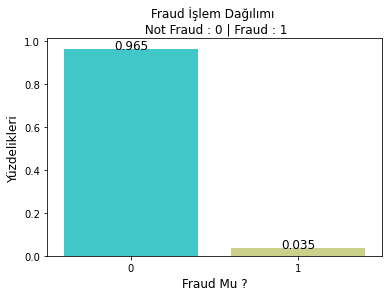

In [19]:
size = 12
data = pd.DataFrame(train.isFraud.value_counts() / len(train)).reset_index()
fraud = sns.barplot(x = data["index"], y = data["isFraud"] , palette="rainbow")

for index, row in enumerate(data["isFraud"]):
     
    fraud.text(index, row , round(row,3) , size = size , ha = "center" , color = "black")

#   fraud.text(row.name, row.isFraud, round(row.isFraud, 3), size = size, ha = "center" , color = "black")

plt.title("Fraud İşlem Dağılımı \n Not Fraud : 0 | Fraud : 1")
plt.xlabel(f"Fraud Mu ?", size = size)
plt.ylabel("Yüzdelikleri" , size = size);

# TransactionDT - timedelta from a given reference datetime

In [20]:
# En büyük max aralığına test["TransactionDT"] sahiptir !!!!
# En küçük min aralığına train["TransactionDT"] sahiptir !!!


train_span = (train["TransactionDT"].max() - train["TransactionDT"].min()) / (60*60*24)

test_span = (test["TransactionDT"].max() - test["TransactionDT"].min()) / (60*60*24)

total_span = (test["TransactionDT"].max() - train["TransactionDT"].min()) / (60*60*24)

gap_span = (test["TransactionDT"].min() - train["TransactionDT"].max()) / (60*60*24)


print(  f"Toplam veri setinin zaman aralığı {total_span} gündür.\n"
        f"Train veri setinin zaman aralığı {train_span} gündür.\n"
        f"Test veri setinin zaman aralığı {test_span} gündür.\n"
        f"Train ve Test arasındaki boşluk {gap_span} gündür.\n")

Toplam veri setinin zaman aralığı 394.99936342592594 gündür.
Train veri setinin zaman aralığı 181.99920138888888 gündür.
Test veri setinin zaman aralığı 182.99908564814814 gündür.
Train ve Test arasındaki boşluk 30.00107638888889 gündür.



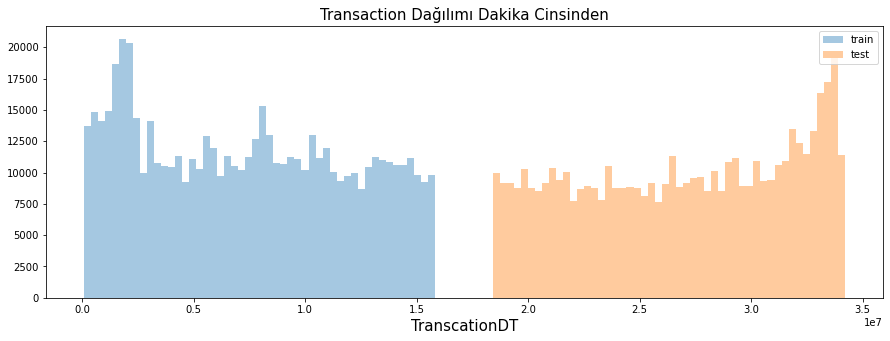

In [21]:
size = 15
plt.figure(figsize = (15,5))
sns.distplot(train["TransactionDT"],kde = False, label = "train") 
sns.distplot(test["TransactionDT"],kde = False,label = "test") 
plt.title("Transaction Dağılımı Dakika Cinsinden",size = size) 
plt.xlabel("TranscationDT" ,size = size)
plt.legend(loc = "upper right");

In [22]:
train["day"] = (((train["TransactionDT"] // (60*60*24) -1 ) % 7) + 1)
test["day"] = (((test["TransactionDT"] // (60*60*24) -1 ) % 7) + 1)

In [23]:
train_day = (train.groupby("isFraud")["day"].value_counts(normalize = True) ) * 100
train_day

isFraud  day
0        1     16.66184
         7     14.59368
         4     14.51998
         6     14.46102
         5     14.39118
         2     13.48905
         3     11.88327
1        1     17.18047
         7     15.53985
         2     14.33964
         6     14.25737
         5     13.56531
         4     13.00392
         3     12.11344
Name: day, dtype: float64

In [24]:
#( train[train["isFraud"] == 1]["day"].value_counts() /train[train["isFraud"] == 1]["day"].count()) * 100

**Burda 1. gün , 2.gün ve 7. gün daha çok Fraud sahip diğer günlere nazaran**

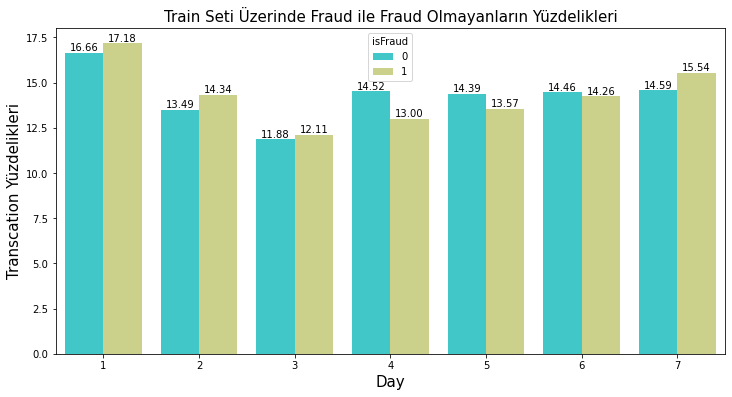

In [25]:
data_day = (train.groupby("isFraud")["day"].value_counts(normalize = True) * 100)\
           .rename("percentage").reset_index().sort_values("day")


plt.figure(figsize = (12,6))
bar = sns.barplot(data_day["day"] , data_day["percentage"] , hue = data_day["isFraud"], palette = "rainbow")


#for index, row in enumerate(data_day.percentage):
#    bar.texts(index, row , round(row,3), ha = "center" , va = "center" )

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

size = 15
bar.set_ylabel("Transcation Yüzdelikleri",size = size)
bar.set_xlabel("Day",size = size)
bar.set_title("Train Seti Üzerinde Fraud ile Fraud Olmayanların Yüzdelikleri",size = size);

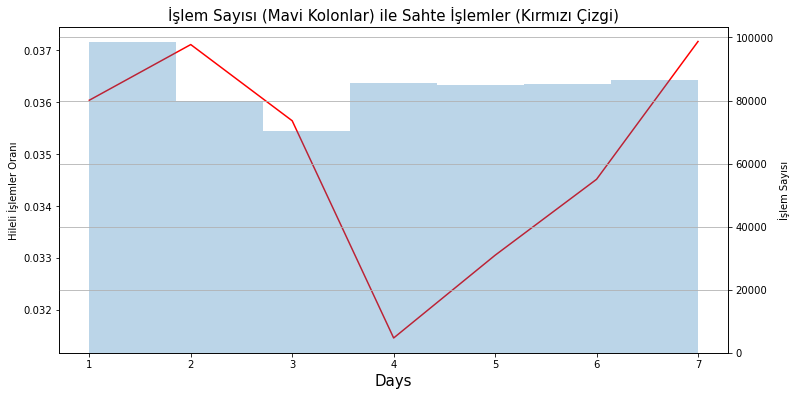

In [26]:
fig,axes = plt.subplots(1,1,figsize = (12,6))

value = train.groupby("day")["isFraud"].mean()
plt.plot(value, c = "r")

ax = plt.gca()
ax2=ax.twinx()
ax2.hist(train["day"],bins = 7, alpha =0.3)

size = 15
ax.set_xlabel("Days" , size = size)
ax.set_ylabel("Hileli İşlemler Oranı")
ax2.set_ylabel("İşlem Sayısı")
plt.grid(True)
plt.title("İşlem Sayısı (Mavi Kolonlar) ile Sahte İşlemler (Kırmızı Çizgi)", size = size)
plt.show()

### Değişiklik yapalım burda !!!


***1 ile 2 ve 6 ile 7 Yüksek Riskli....***

***2'den 4'e kadar Düşük Riskli...***

***4 ile 6 arası Orta Riskli....***

In [27]:
def new_day_feature(dataframe):

    day = dataframe
    
    if (day >=1 and day <=2) or (day >=6 and day <=7):
        return "HighRiskDays"
    
    elif day > 2 and day <=4:
        return "LowRiskDays"
    
    elif day > 4  and day < 6:
        return "MediumRiskDays"
    

In [28]:
train["day_risk"] = train["day"].apply(new_day_feature)
test["day_risk"] = test["day"].apply(new_day_feature)

-

In [29]:
train["hours"] = ((train["TransactionDT"] // (60*60)) % 24) + 1
test["hours"] = ((test["TransactionDT"] // (60*60)) % 24) + 1

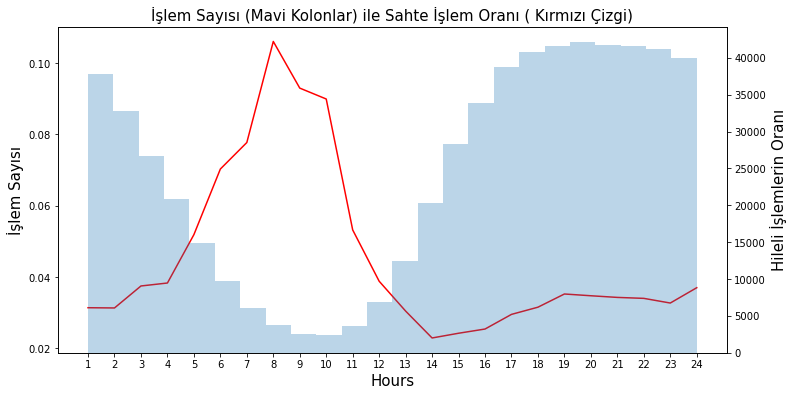

In [30]:
fig,axes = plt.subplots(1,1,figsize = (12,6))

value = train.groupby("hours")["isFraud"].mean()
plt.plot(value , axes = axes, c  = "red")

ax = plt.gca()
ax2 = ax.twinx()
ax2.hist(train["hours"],bins = 24 , alpha = 0.3);

size = 15
ax.set_ylabel("İşlem Sayısı", size = size)
ax.set_xlabel("Hours", size = size)
ax2.set_ylabel("Hileli İşlemlerin Oranı", size = size)
plt.title("İşlem Sayısı (Mavi Kolonlar) ile Sahte İşlem Oranı ( Kırmızı Çizgi)" , size = size)
plt.xticks(np.arange(1,25,1))
plt.show()

***Yukarıdaki grafikte sabah 4'ten akşam 12'e kadar dolandırıcılık oranlarının diğer saatlere göre önemli ölçüde yüksek gözükmektedir...*** 

***14 ile 16 arasında dolandırıcılık oranı en düşüktür...***

***7 ile 10'a kadar olan kesim en yüksektir ....***

In [31]:
def new_hour_feature(dataframe):
    
    hours = dataframe
    
    if hours >= 7 and hours < 10:
        return "HighRiskHours"
    
    elif hours >=14 and hours < 16:
        return "LowestRiskHours"
    
    elif (hours >=4 and hours <7) or (hours >= 10 and hours < 14):
        return "MediumRiskHours"
    
    else:
        return "LowRiskHours"

In [32]:
train["hours_risk"] = train["hours"].apply(new_hour_feature)
test["hours_risk"] = test["hours"].apply(new_hour_feature)

## TransactionAmt 

In [33]:
describe = pd.DataFrame(columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

describe.loc["TransactionAmt_Train" , :] = train[["TransactionAmt"]].describe().T.values
describe.loc["TransactionAmt_Test", :] = test[["TransactionAmt"]].describe().T.values

describe

,count,mean,std,min,25%,50%,75%,max
TransactionAmt_Train,590540.00000,135.02718,239.16252,0.25100,43.32100,68.76900,125.00000,31937.39100
TransactionAmt_Test,506691.00000,134.72557,245.77982,0.01800,40.00000,67.95000,125.00000,10270.00000


In [34]:
train[train["TransactionAmt"] > 10000]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,day_risk,hours,hours_risk
274336,3261336,0,6652360,31937.39100,W,16075,514.00000,150.00000,mastercard,102.00000,credit,205.00000,87.00000,27.00000,NaN,yahoo.com,NaN,1.00000,2.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,0.00000,0.00000,NaN,NaN,NaN,0.00000,T,T,T,NaN,NaN,NaN,F,F,T,1.00000,3.00000,3.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,2.00000,2.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,2.00000,2.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

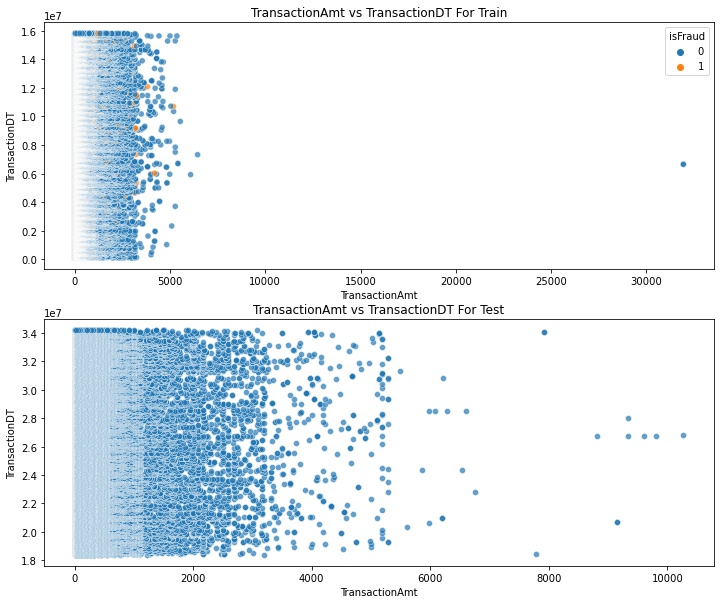

In [35]:
fig , axes = plt.subplots(2,1,figsize = (12,10))

sns.scatterplot(x = train["TransactionAmt"] , y = train["TransactionDT"], ax= axes[0], 
                hue = train["isFraud"], alpha = 0.7)

sns.scatterplot(x = test["TransactionAmt"], y = test["TransactionDT"] , ax = axes[1], alpha = 0.7)

axes[0].set_title("TransactionAmt vs TransactionDT For Train")
axes[1].set_title("TransactionAmt vs TransactionDT For Test" )
plt.show()

In [36]:
def check_outliers(dataframe ,col_name ,q1 = 0.25 ,q3 = 0.75):
    
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    IQR = quantile3 - quantile1
    up_limit = quantile3 + 1.5*IQR
    low_limit = quantile1 - 1.5*IQR
    
    return up_limit, low_limit


def grap_outliers(dataframe,col_name , q1 = 0.25 , q3 = 0.75):
    
    up_limit , low_limit = check_outliers(dataframe, col_name, q1 , q3)
    
    check_data = dataframe[ (dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis = None)
    
    if check_data :
        
        result = print(f"{col_name.upper()} İçin Aykırı Değer Var !!!")
        
        return result
    
    else:
        
        result = print(f"{col_name.upper()} İçin Aykırı Değer Yok !!!")
        
        return result

In [37]:
outliers = 0

col_names = [col for col in train.columns if train[col].dtype != "object"]

#for col_name in col_names :
    
#    grap_outliers(train,col_name)

In [38]:
# Benzer olan 2 TransactionAmt attık ....

train = train[~(train["TransactionAmt"] > 10000)]

In [39]:
train[["TransactionAmt"]].describe().T

,count,mean,std,min,25%,50%,75%,max
TransactionAmt,590538.00000,134.91947,231.89129,0.25100,43.32100,68.75800,125.00000,6450.97000


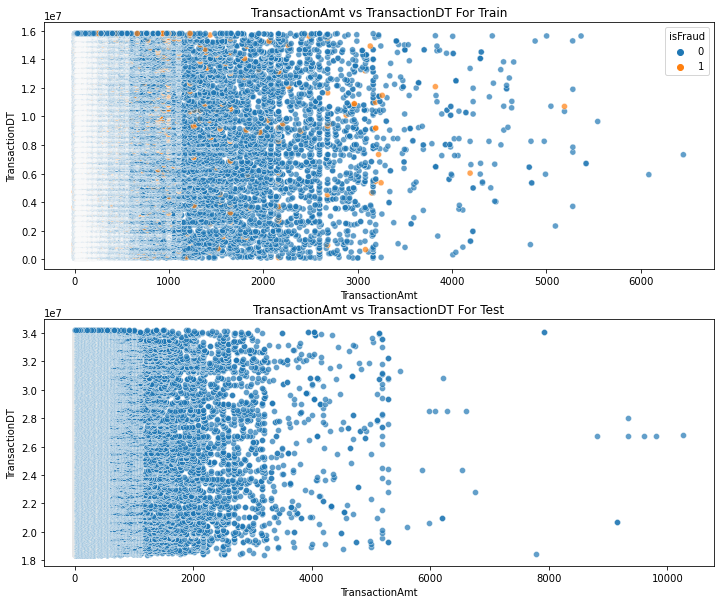

In [40]:
fig , axes = plt.subplots(2,1,figsize = (12,10))

sns.scatterplot(x = train["TransactionAmt"] , y = train["TransactionDT"], ax= axes[0], 
                hue = train["isFraud"], alpha = 0.7)

sns.scatterplot(x = test["TransactionAmt"], y = test["TransactionDT"] , ax = axes[1], alpha = 0.7)

axes[0].set_title("TransactionAmt vs TransactionDT For Train")
axes[1].set_title("TransactionAmt vs TransactionDT For Test" )
plt.show()

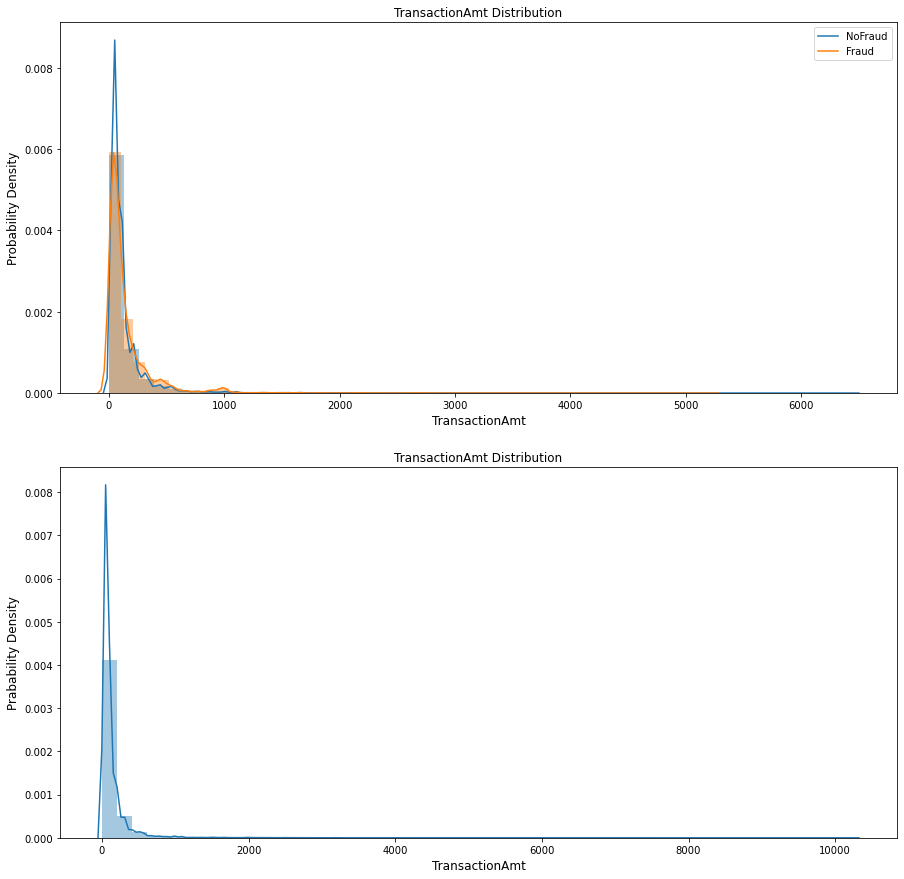

In [41]:
fig, axes = plt.subplots(2,1,figsize = (15,15))

sns.distplot(train[train["isFraud"] == 0]["TransactionAmt"], ax = axes[0])
sns.distplot(train[train["isFraud"] == 1]["TransactionAmt"], ax = axes[0])

sns.distplot(test["TransactionAmt"] , ax = axes[1])

plt.title("TransactionAmt Distribution" , size = 12)

axes[0].legend(["NoFraud","Fraud"])
axes[0].set_ylabel("Probability Density" , size = 12)
axes[0].set_xlabel("TransactionAmt" , size = 12)
axes[0].set_title("TransactionAmt Distribution" , size = 12)

axes[1].set_ylabel("Prabability Density" , size = 12)
axes[1].set_xlabel("TransactionAmt" , size = 12)
axes[1].set_title("TransactionAmt Distribution" , size = 12)

plt.show()

- 

In [42]:
train["LogTransactionAmt"] = np.log(train["TransactionAmt"])
test["LogTransactionAmt"] = np.log(test["TransactionAmt"])

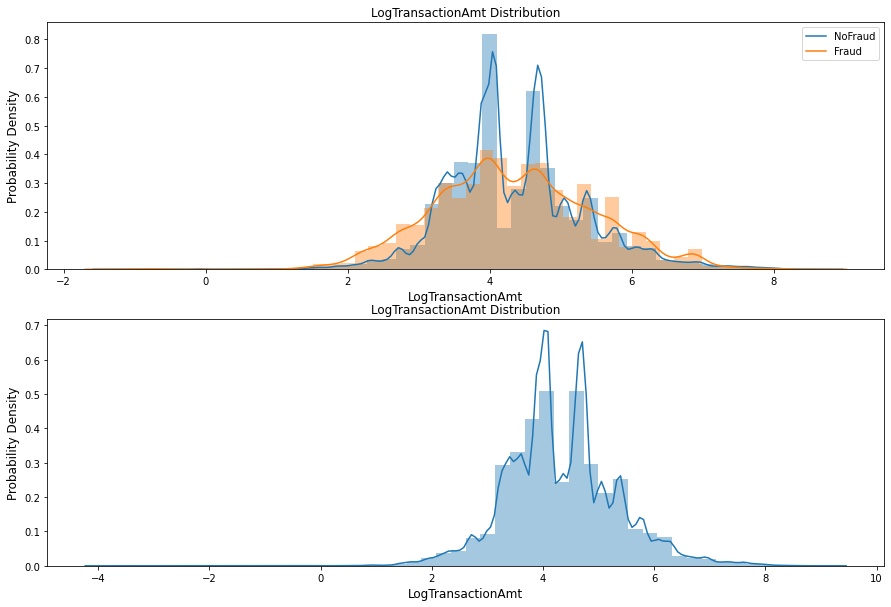

In [43]:
fig, axes = plt.subplots(2,1,figsize = (15,10))

sns.distplot(train[train["isFraud"] == 0]["LogTransactionAmt"] , ax = axes[0])
sns.distplot(train[train["isFraud"] == 1]["LogTransactionAmt"] , ax = axes[0])

sns.distplot(test["LogTransactionAmt"], ax = axes[1])

axes[0].set_title("LogTransactionAmt Distribution" , size = 12)
axes[0].set_ylabel("Probability Density", size = 12)
axes[0].set_xlabel("LogTransactionAmt" , size = 12)
axes[0].legend(["NoFraud","Fraud"])

axes[1].set_title("LogTransactionAmt Distribution" , size = 12)
axes[1].set_ylabel("Probability Density", size = 12)
axes[1].set_xlabel("LogTransactionAmt" , size = 12)

plt.show()

***Bu iki aralıkta Fraud olma olasılığı daha az iken ; Diğer aralıklarda Fraud olma olasılığı daha yüksektir...***

In [44]:
log_mean = train["LogTransactionAmt"].mean()
log_std = train["LogTransactionAmt"].std()

high , low = log_mean + log_std , log_mean - log_std
print("High Price : {}\nLow Price : {}".format( high , low))

High Price : 5.317817918134969
Low Price : 3.4098690498754465


In [45]:
def risk_transaction_range(value):
    
    if value > high:
        
        return "HighRisk"
    
    elif value < low:
        
        return "HighRisk"
    
    else:
        
        return "LowRiks"
    
train["Risk_Transaction"] = train["LogTransactionAmt"].apply(risk_transaction_range)
test["Risk_Transaction"] = test["LogTransactionAmt"].apply(risk_transaction_range)

In [46]:
train[["Risk_Transaction","LogTransactionAmt"]].head()

,Risk_Transaction,LogTransactionAmt
0,LowRiks,4.22683
1,HighRisk,3.36730
2,LowRiks,4.07754
3,LowRiks,3.91202
4,LowRiks,3.91202


## ProductCD

***Ürün ismi C olduğunda bir Fraud işlemi gerçekleşme olasılığı yüksek olabilir !!!!***

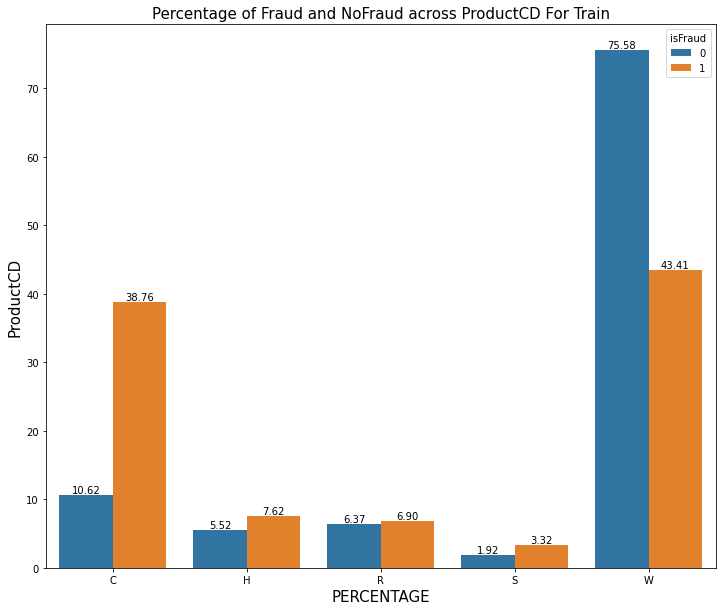

In [47]:
fig , axes = plt.subplots(1,1,figsize = (12,10))
productCD_Per = train.groupby("isFraud")["ProductCD"].value_counts(normalize = True).rename("PERCENTAGE")*100
productCD_Per = pd.DataFrame(productCD_Per).reset_index().sort_values("ProductCD")

bar = sns.barplot(x = productCD_Per["ProductCD"] , y = productCD_Per["PERCENTAGE"], 
                  hue = productCD_Per["isFraud"])

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.title("Percentage of Fraud and NoFraud across ProductCD For Train",size = 15)
plt.xlabel("PERCENTAGE", size = 15)
plt.ylabel("ProductCD" , size = 15)
plt.show()

In [48]:
def Risk_ProductCD(product):
    
    if product == "C":
        return "HighRisk"
    elif product == "W":
        return "HighRisk"
    else:
        return "LowRisk"
    

train["Risk_ProductCD"] = train["ProductCD"].apply(Risk_ProductCD)
test["Risk_ProductCD"] = test["ProductCD"].apply(Risk_ProductCD)

train[["Risk_ProductCD" , "ProductCD"]].tail(20)

,Risk_ProductCD,ProductCD
590520,HighRisk,W
590521,HighRisk,C
590522,HighRisk,W
590523,HighRisk,W
590524,HighRisk,W
590525,HighRisk,W
590526,LowRisk,R
590527,HighRisk,W
590528,HighRisk,W
590529,HighRisk,C


## CARD

In [49]:
# Card 5 ile Card 6 object diğerleri float tipine sahip !!!!

train.loc[:,train.columns.str.contains("card")].head()

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.00000,discover,142.00000,credit
1,2755,404.00000,150.00000,mastercard,102.00000,credit
2,4663,490.00000,150.00000,visa,166.00000,debit
3,18132,567.00000,150.00000,mastercard,117.00000,debit
4,4497,514.00000,150.00000,mastercard,102.00000,credit


In [50]:
data_card = pd.DataFrame(columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])

for i in range(1,7):
    
    col_name = "card"+str(i)
    
    if train[col_name].dtype != "object" :
        
        data_card.loc[ col_name ,:] = train[[col_name]].describe().T.values
    
data_card

,count,mean,std,min,25%,50%,75%,max
card1,590538.00000,9898.71374,4901.16527,1000.00000,6019.00000,9678.00000,14182.75000,18396.00000
card2,581605.00000,362.55497,157.79327,100.00000,214.00000,361.00000,512.00000,600.00000
card3,588973.00000,153.19494,11.33646,100.00000,150.00000,150.00000,150.00000,231.00000
card5,586279.00000,199.27923,41.24413,100.00000,166.00000,226.00000,226.00000,237.00000


In [51]:
#fig , axes = plt.subplots(4,2,figsize = (30, 30)) 

#liste = [1,2,3,5]

#for i in range(len(liste)):
    
#    col_name = "card" + str(liste[i])
#    
#    sns.distplot(train[train["isFraud"] == 0][col_name] ,ax = axes[i][0])
#    sns.distplot(train[train["isFraud"] == 1][col_name] ,ax = axes[i][0])
    
#    sns.distplot(test[col_name], ax = axes[i][1])
    
#    size = 12
    
#    axes[i][0].set_xlabel(col_name.upper(), size = size)
#    axes[i][0].set_ylabel("PROBABILITY DENSITY" , size = size)
#    axes[i][0].set_title("TRAIN" , size = size)
#    axes[i][0].legend(["NoFraud" , "Fraud"])
    
#    axes[i][1].set_xlabel(col_name.upper(), size = size)
#    axes[i][1].set_ylabel("PROBABILITY DENSITY", size = size)
#    axes[i][1].set_title("TEST", size = size)
    
#    plt.tight_layout()

In [52]:
#fig , axes = plt.subplots(4,2,figsize = (30, 30)) 

#liste = [1,2,3,5]

#for i in range(len(liste)):
    
##    col_name = "card" + str(liste[i])
    
#    sns.distplot(train[(train["isFraud"] == 0) & (~train[col_name].isnull())][col_name] ,ax = axes[i][0])
#    sns.distplot(train[(train["isFraud"] == 1) & (~train[col_name].isnull())][col_name] ,ax = axes[i][0])
    
#    sns.distplot(test[~test[col_name].isnull()][col_name], ax = axes[i][1])
    
#    size = 12
    
#    axes[i][0].set_xlabel(col_name.upper(), size = size)
#    axes[i][0].set_ylabel("PROBABILITY DENSITY" , size = size)
#    axes[i][0].set_title("TRAIN" , size = size)
#    axes[i][0].legend(["NoFraud" , "Fraud"])
    
#    axes[i][1].set_xlabel(col_name.upper(), size = size)
#    axes[i][1].set_ylabel("PROBABILITY DENSITY", size = size)
#    axes[i][1].set_title("TEST", size = size)
    
#    plt.tight_layout()

***Burada Card 3 kategorik bir veri gibi gözükmekte bunlara bir ayrım noktası yaratabiliriz ...***

In [53]:
# 1565 tane boş değer var
train["card3"].isnull().sum()

1565

In [54]:
def card3_create(dataframe):
    
    card3 = dataframe
    
    if card3 == np.nan:
        return car3
    
    else:
        if card3 > 160 :
            return "Positive"
        else:
            return "Negative"

In [55]:
train["new_card3"] = train["card3"].apply(card3_create)
test["new_card3"] = test["card3"].apply(card3_create)

In [56]:
train["new_card3"].value_counts()

Negative    531922
Positive     58616
Name: new_card3, dtype: int64

In [57]:
train["new_card3"].isnull().sum(),test["new_card3"].isnull().sum()

(0, 0)

In [58]:
train["new_card3"].unique()

array(['Negative', 'Positive'], dtype=object)

In [59]:
# Na Değeri her türlü yanlış dönüyor o yüzden negatif olarak atanıyor
# np.nan > -1 ile np.nan < -1 değeri hep False Döner !!!!

train[~(train["card3"] > -1)][["card3","new_card3"]].head(5)

,card3,new_card3
9686,NaN,Negative
28994,NaN,Negative
29013,NaN,Negative
254275,NaN,Negative
283428,NaN,Negative


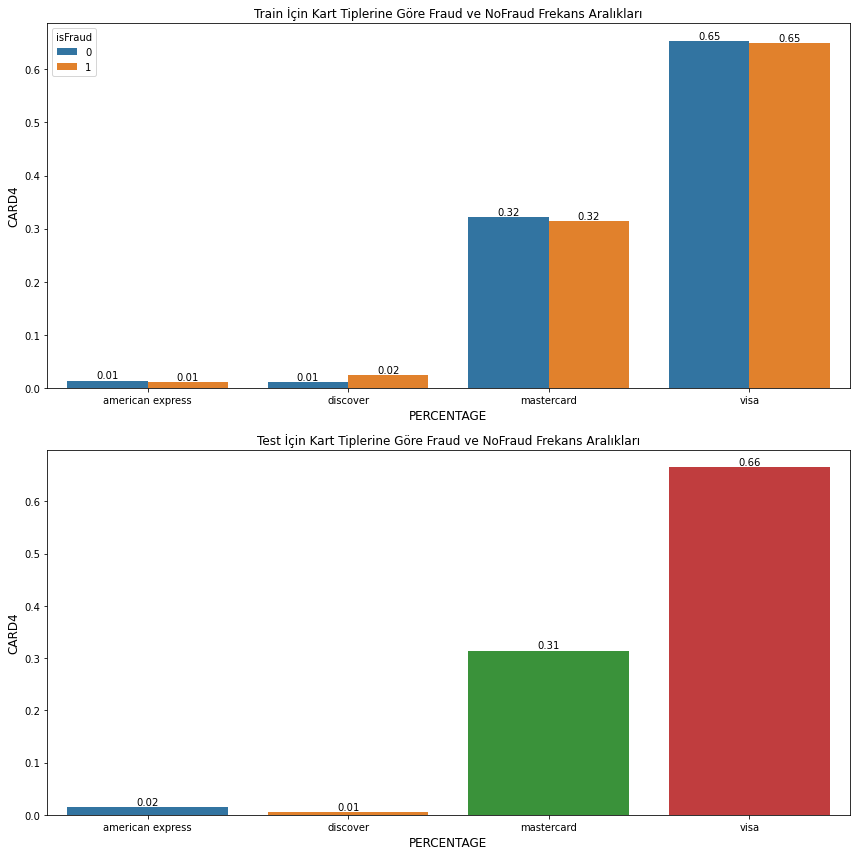

In [60]:
fig , axes = plt.subplots(2,1,figsize = (12,12))

train_card4 = train[~train["card4"].isnull()].groupby("isFraud")["card4"].value_counts(normalize=True).rename("Percentage")
train_card4 = pd.DataFrame(train_card4).reset_index().sort_values("card4")


test_card4 = test[~test["card4"].isnull()]["card4"].value_counts(normalize=True).rename("Percentage")
test_card4 = pd.DataFrame(test_card4).reset_index()
test_card4.columns = ["card4","Percentage"]
test_card4 = test_card4.sort_values("card4")

bar = sns.barplot(x = train_card4["card4"], y = train_card4["Percentage"], 
                 hue = train_card4["isFraud"], ax = axes[0])


for p in bar.patches:
    bar.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

axes[0].set_xlabel("PERCENTAGE" , size = 12)
axes[0].set_ylabel("CARD4", size = 12)
axes[0].set_title("Train İçin Kart Tiplerine Göre Fraud ve NoFraud Frekans Aralıkları", size = 12)


bar2 = sns.barplot(test_card4["card4"] , test_card4["Percentage"])

for p in bar2.patches:
    bar2.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


axes[1].set_xlabel("PERCENTAGE" , size = 12)
axes[1].set_ylabel("CARD4", size = 12)
axes[1].set_title("Test İçin Kart Tiplerine Göre Fraud ve NoFraud Frekans Aralıkları", size = 12)

plt.tight_layout()
plt.show()

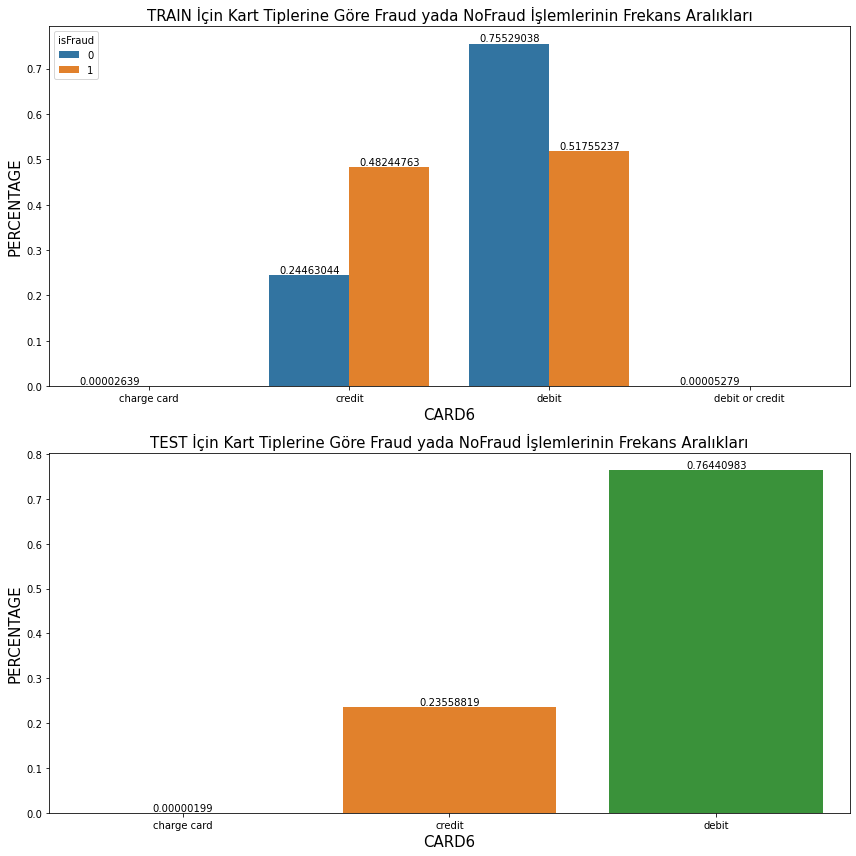

In [61]:
fig , axes = plt.subplots(2,1,figsize = (12,12))

train_card6 = train[~train["card6"].isnull()].groupby("isFraud")["card6"].value_counts(normalize = True).\
              rename("Percentage")
train_card6 = pd.DataFrame(train_card6).reset_index().sort_values("card6")


test_card6 = test[~test["card6"].isnull()]["card6"].value_counts(normalize = True).rename("Percentage")
test_card6 = pd.DataFrame(test_card6).reset_index()
test_card6.columns = ["card6","Percentage"]
test_card6 = test_card6.sort_values("card6")

bar = sns.barplot(x = train_card6["card6"] , y = train_card6["Percentage"], 
                  hue = train_card6["isFraud"] , ax = axes[0])

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.8f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
bar2 = sns.barplot(test_card6["card6"],test_card6["Percentage"])

for p in bar2.patches:
    bar2.annotate(format(p.get_height(), '.8f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    

size = 15
axes[0].set_title("TRAIN İçin Kart Tiplerine Göre Fraud yada NoFraud İşlemlerinin Frekans Aralıkları",
                  size = size)
axes[0].set_xlabel("CARD6" , size = size)
axes[0].set_ylabel("PERCENTAGE",size = size)

axes[1].set_title("TEST İçin Kart Tiplerine Göre Fraud yada NoFraud İşlemlerinin Frekans Aralıkları",
                  size = size)
axes[1].set_xlabel("CARD6" , size = size)
axes[1].set_ylabel("PERCENTAGE", size = size)

plt.tight_layout()
plt.show()

In [62]:
print("Train Verisi İçin %s tane CHARGE CARD gözlem vardır..." 
      % (train[train["card6"] == "charge card"]["card6"].shape[0]) )
print("\n")
print("Train Verisi İçin %s tane DEBIT OR CREDIT gözlem vardır..." 
      % (train[train["card6"] == "debit or credit"]["card6"].shape[0]) )

Train Verisi İçin 15 tane CHARGE CARD gözlem vardır...


Train Verisi İçin 30 tane DEBIT OR CREDIT gözlem vardır...


In [63]:
def replace_card(dataframe):
    
    replace = dataframe
    
    if replace == np.nan:
        
        return replace
        
    else:
        
        if replace == "debit or credit" or replace =="charge card":
            
            return "debit"
        
        else:
            
            return replace

In [64]:
train["card6"].unique(),test["card6"].unique()

(array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
       dtype=object),
 array(['debit', 'credit', nan, 'charge card'], dtype=object))

In [65]:
train["card6"] = train["card6"].apply(replace_card)
test["card6"] = test["card6"].apply(replace_card)

In [66]:
train["card6"].fillna("UnKnown" , inplace = True)
test["card6"].fillna("UnKnown" , inplace = True)

In [67]:
train["card6"].unique(),test["card6"].unique()

(array(['credit', 'debit', 'UnKnown'], dtype=object),
 array(['debit', 'credit', 'UnKnown'], dtype=object))

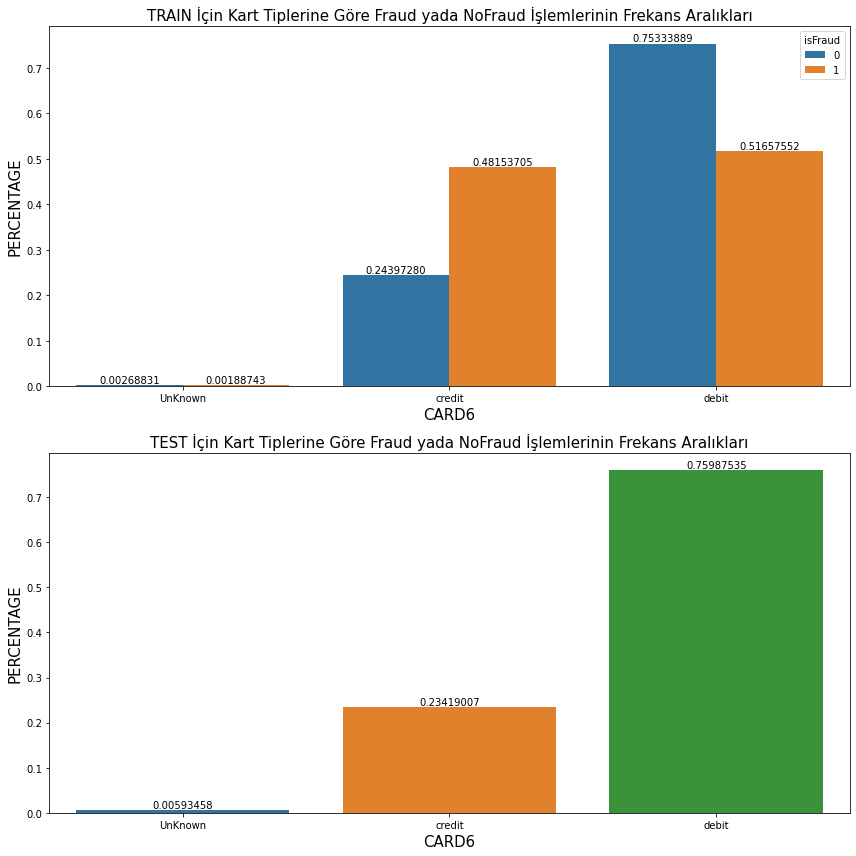

In [68]:
fig , axes = plt.subplots(2,1,figsize = (12,12))

train_card6 = train[~train["card6"].isnull()].groupby("isFraud")["card6"].value_counts(normalize = True).\
              rename("Percentage")
train_card6 = pd.DataFrame(train_card6).reset_index().sort_values("card6")


test_card6 = test[~test["card6"].isnull()]["card6"].value_counts(normalize = True).rename("Percentage")
test_card6 = pd.DataFrame(test_card6).reset_index()
test_card6.columns = ["card6","Percentage"]
test_card6 = test_card6.sort_values("card6")

bar = sns.barplot(x = train_card6["card6"] , y = train_card6["Percentage"], 
                  hue = train_card6["isFraud"] , ax = axes[0])

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.8f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
bar2 = sns.barplot(test_card6["card6"],test_card6["Percentage"])

for p in bar2.patches:
    bar2.annotate(format(p.get_height(), '.8f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                     ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    

size = 15
axes[0].set_title("TRAIN İçin Kart Tiplerine Göre Fraud yada NoFraud İşlemlerinin Frekans Aralıkları",
                  size = size)
axes[0].set_xlabel("CARD6" , size = size)
axes[0].set_ylabel("PERCENTAGE",size = size)

axes[1].set_title("TEST İçin Kart Tiplerine Göre Fraud yada NoFraud İşlemlerinin Frekans Aralıkları",
                  size = size)
axes[1].set_xlabel("CARD6" , size = size)
axes[1].set_ylabel("PERCENTAGE", size = size)

plt.tight_layout()
plt.show()

## addr1 and addr2

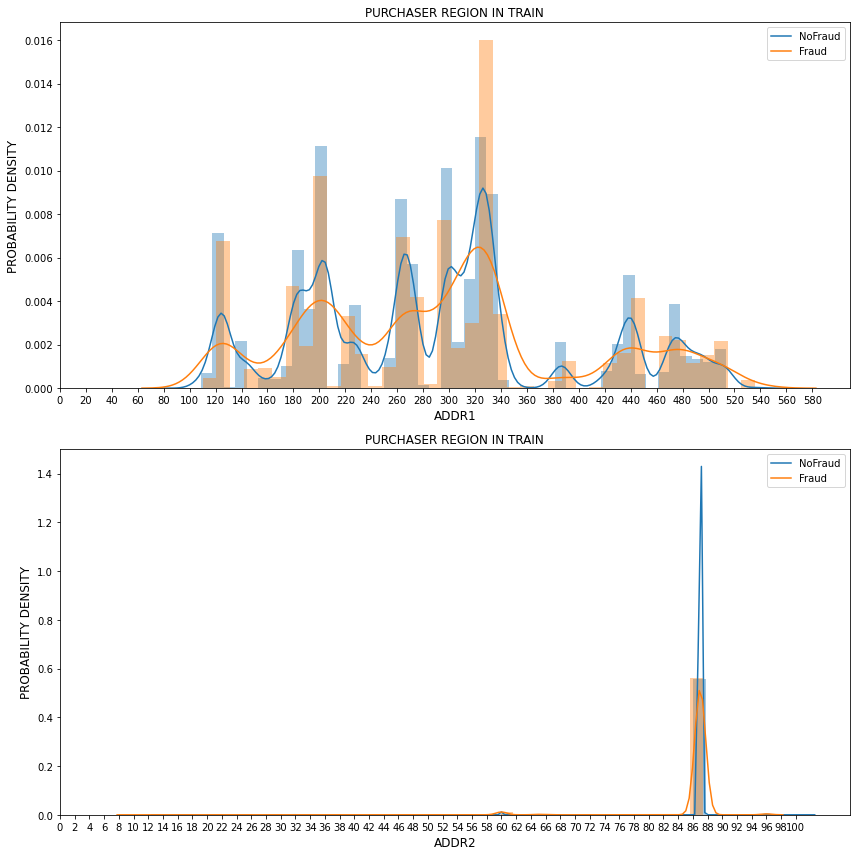

In [69]:
fig,axes = plt.subplots(2,1,figsize = (12,12))
sns.distplot(train[(train['isFraud'] == 0) & (~train['addr1'].isnull())]['addr1'] , ax = axes[0])
sns.distplot(train[(train['isFraud'] == 1) & (~train['addr1'].isnull())]['addr1'] , ax = axes[0])

sns.distplot(train[(train["isFraud"] == 0) & (~train["addr2"].isnull())]["addr2"] , ax = axes[1])
sns.distplot(train[(train["isFraud"] == 1) & (~train["addr2"].isnull())]["addr2"] , ax = axes[1])

size = 12
axes[0].set_ylabel('Probability Density'.upper() , size = size)
axes[0].set_xlabel('addr1'.upper() , size = size)
axes[0].set_title('Purchaser Region in Train'.upper() , size = size)
axes[0].legend(['NoFraud','Fraud'])
axes[0].set_xticks(np.arange(0,600,20))


axes[1].set_ylabel('Probability Density'.upper() , size = size)
axes[1].set_xlabel('addr2'.upper() , size = size)
axes[1].set_title('Purchaser Region in Train'.upper() , size = size)
axes[1].legend(['NoFraud','Fraud'])
axes[1].set_xticks(np.arange(0,102,2))

plt.tight_layout()
plt.show()

***"addr1": 330 ile 340 arasında FRAUD sıklığı çok fazla gözükmekte..!!!!***

***"addr2": 96 ,87 , 60 hariç yeteri kadar bir bilgi yok..!!!***

## dist1 and dist2

In [70]:
dist_describe = pd.DataFrame()

dist_train = train.loc[:,train.columns.str.contains("dist")].describe().T
dist_train.index = ["dist1_train","dist2_train"]

dist_test = test.loc[:,test.columns.str.contains("dist")].describe().T
dist_test.index = ["dist1_test","dist2_test"]

pd.concat([dist_train , dist_test] , axis = 0)

,count,mean,std,min,25%,50%,75%,max
dist1_train,238267.00000,118.50295,371.87349,0.00000,3.00000,8.00000,24.00000,10286.00000
dist2_train,37627.00000,231.85542,529.05349,0.00000,7.00000,37.00000,206.00000,11623.00000
dist1_test,215474.00000,87.06527,314.13169,0.00000,3.00000,8.00000,20.00000,8081.00000
dist2_test,36436.00000,237.17505,556.45083,0.00000,7.00000,44.00000,196.00000,9213.00000


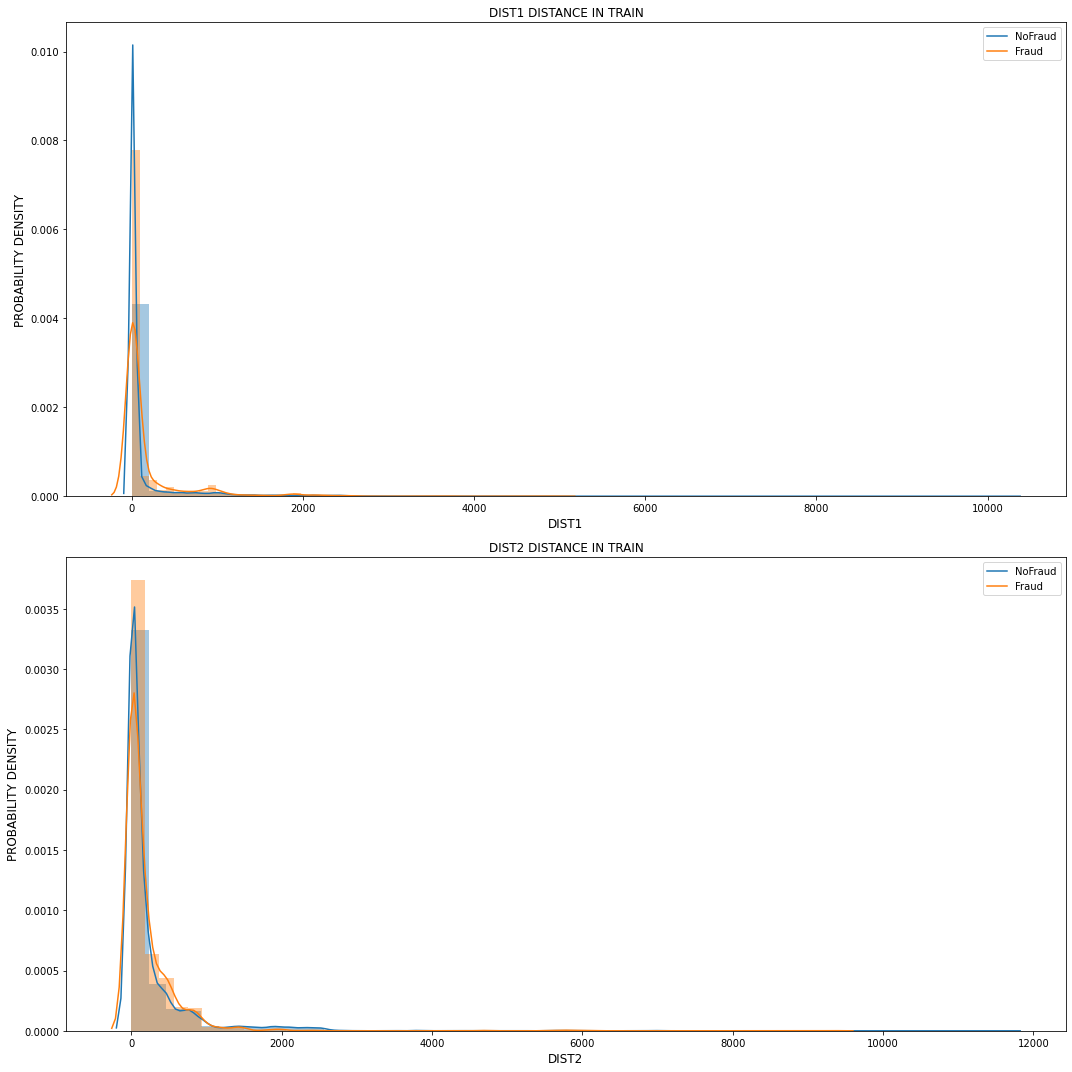

In [71]:
fig,axes = plt.subplots(2,1,figsize = (15,15))
sns.distplot(train[(train['isFraud'] == 0) & (~train['dist1'].isnull())]['dist1'] , ax = axes[0])
sns.distplot(train[(train['isFraud'] == 1) & (~train['dist1'].isnull())]['dist1'] , ax = axes[0])

sns.distplot(train[(train["isFraud"] == 0) & (~train["dist2"].isnull())]["dist2"] , ax = axes[1])
sns.distplot(train[(train["isFraud"] == 1) & (~train["dist2"].isnull())]["dist2"] , ax = axes[1])

size = 12
axes[0].set_ylabel('Probability Density'.upper() , size = size)
axes[0].set_xlabel('dist1'.upper() , size = size)
axes[0].set_title('dist1 Distance in Train'.upper() , size = size)
axes[0].legend(['NoFraud','Fraud'])


axes[1].set_ylabel('Probability Density'.upper() , size = size)
axes[1].set_xlabel('dist2'.upper() , size = size)
axes[1].set_title('dist2 Distance in Train'.upper() , size = size)
axes[1].legend(['NoFraud','Fraud'])


plt.tight_layout()
plt.show()

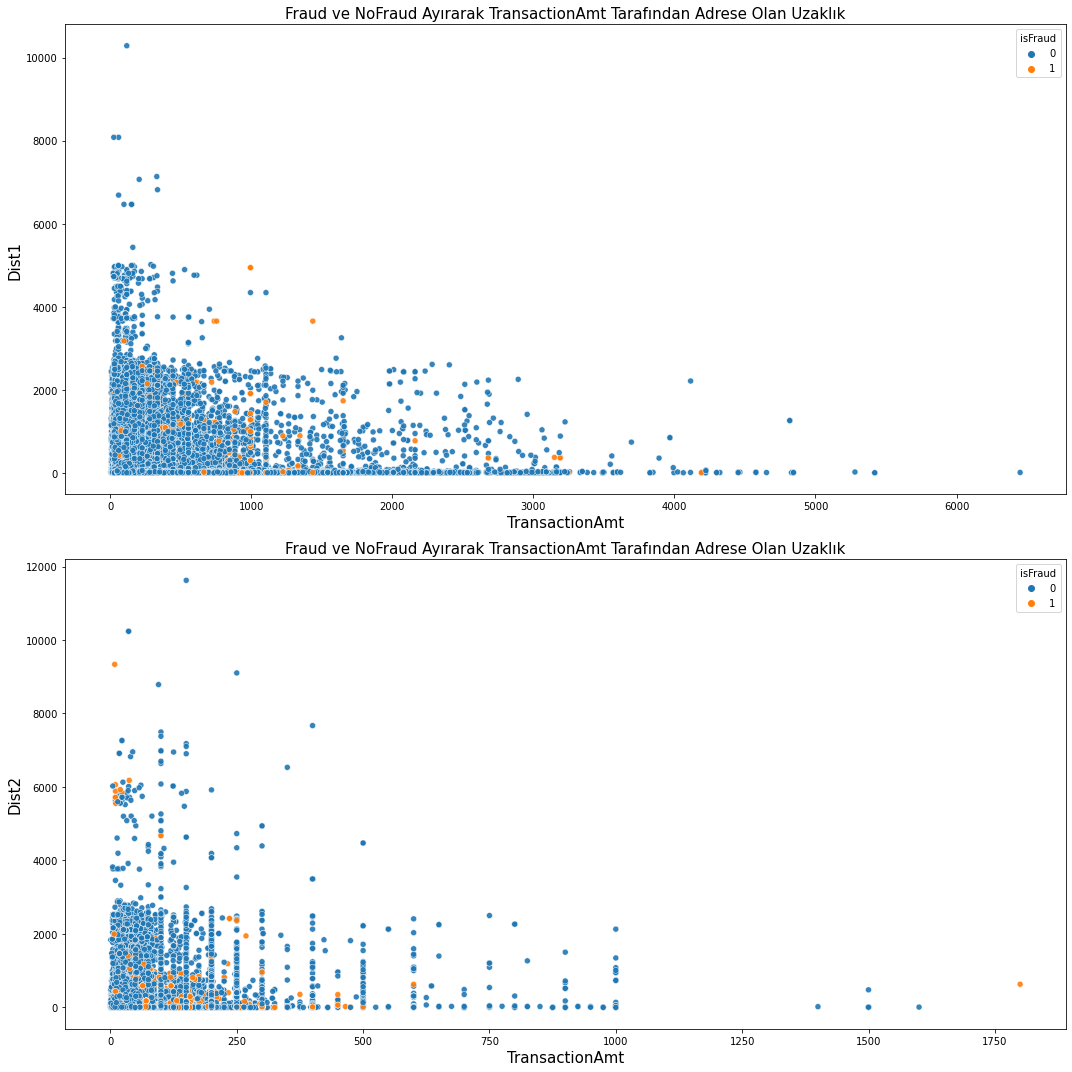

In [72]:
fig , axes = plt.subplots(2,1,figsize = (15,15))

sns.scatterplot(x = "TransactionAmt" , y = "dist1" , hue = "isFraud", 
                data = train[~train["dist1"].isnull()], alpha = 0.9 , ax = axes[0]) 

sns.scatterplot(x = "TransactionAmt" , y = "dist2" , hue = "isFraud", 
                data = train[~train["dist2"].isnull()], alpha = 0.9 , ax = axes[1]) 


size = 15

axes[0].set_title("Fraud ve NoFraud Ayırarak TransactionAmt Tarafından Adrese Olan Uzaklık", size = size)
axes[1].set_title("Fraud ve NoFraud Ayırarak TransactionAmt Tarafından Adrese Olan Uzaklık", size = size)


axes[0].set_xlabel("TransactionAmt" , size = size)
axes[1].set_xlabel("TransactionAmt" , size = size)

axes[0].set_ylabel("Dist1" , size = size)
axes[1].set_ylabel("Dist2" , size = size)

plt.tight_layout()
plt.show()

In [73]:
train = train.copy()

In [74]:
print("Train Shape : {}".format(train.shape))
train = train[~(train["dist1"] > 6000)]
train = train[~(train["dist2"] > 8000)]
print("Last Train Shape : {}".format(train.shape))

Train Shape : (590538, 441)
Last Train Shape : (590521, 441)


## P_emaildomain and R_emaildomain

***Purchaser and Recipient Email Domain***

In [75]:
train["R_emaildomain"].isnull().sum(),train["P_emaildomain"].isnull().sum()

(453236, 94456)

In [76]:
R_email = train[~(train["R_emaildomain"].isnull())]
R_email["R_emaildomain"].value_counts().head()

gmail.com        57144
hotmail.com      27509
anonymous.com    20527
yahoo.com        11841
aol.com           3701
Name: R_emaildomain, dtype: int64

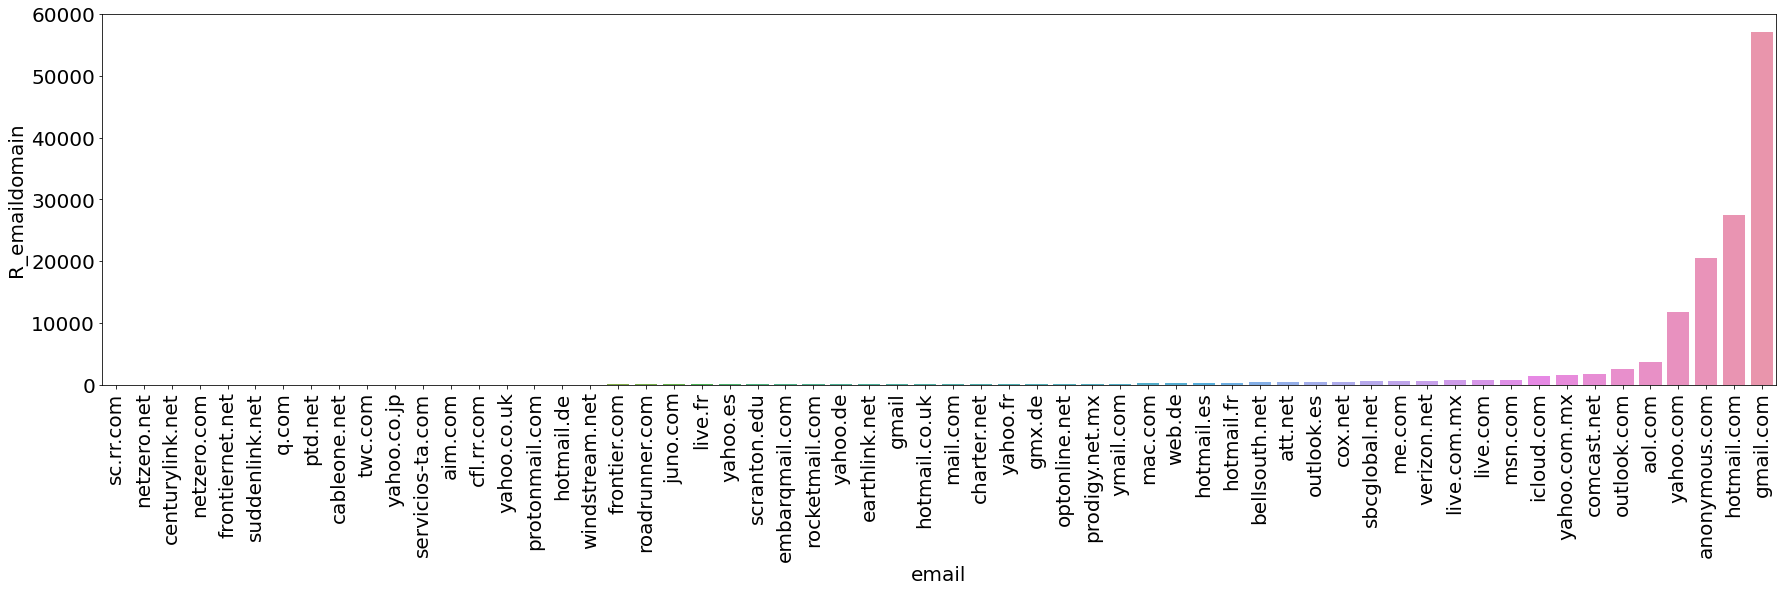

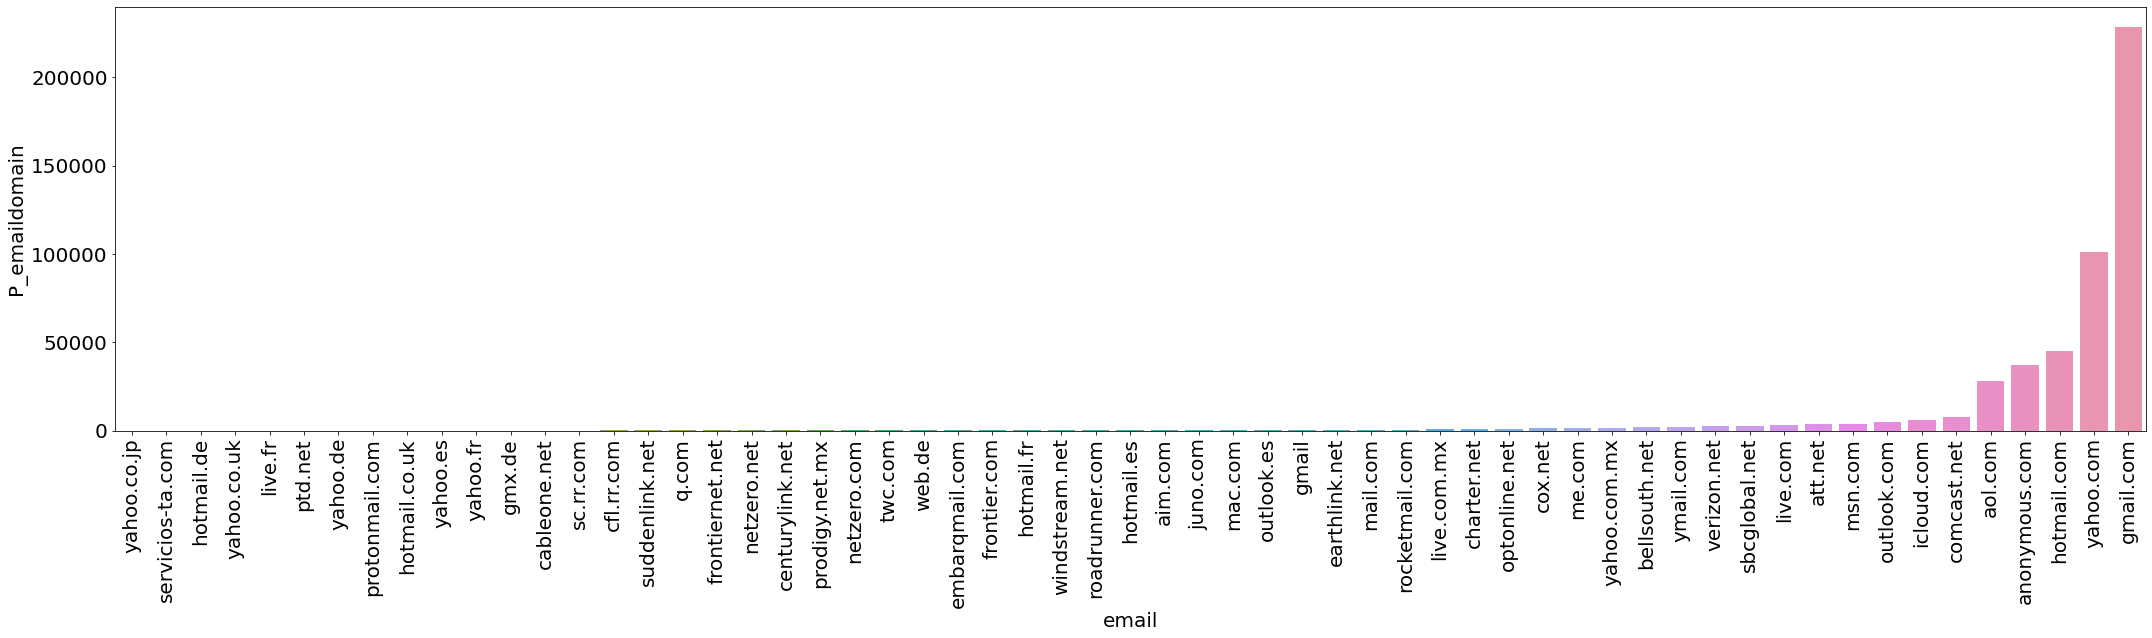

In [77]:
R_email = train[~(train["R_emaildomain"].isnull())]["R_emaildomain"].value_counts().\
          reset_index().sort_values("R_emaildomain")

R_email.columns = ["email" , "R_emaildomain"]

P_email = train[~(train["P_emaildomain"].isnull())]["P_emaildomain"].value_counts().\
          reset_index().sort_values("P_emaildomain")

P_email.columns = ["email" , "P_emaildomain"]

plt.figure(figsize = (30,15))
plt.subplot(2,1,1)

sns.barplot(R_email["email"], R_email["R_emaildomain"])

plt.xticks(rotation = 90 ,fontsize = 20)
plt.yticks(fontsize=20)
plt.xlabel("email",size = 20)
plt.ylabel("R_emaildomain", size = 20)

plt.figure(figsize = (30,15))
plt.subplot(2,1,2)

sns.barplot(P_email["email"], P_email["P_emaildomain"])

plt.xticks(rotation = 90 ,fontsize = 20)
plt.yticks(fontsize=20)
plt.xlabel("email",size = 20)
plt.ylabel("P_emaildomain", size = 20)

plt.tight_layout()
plt.show()

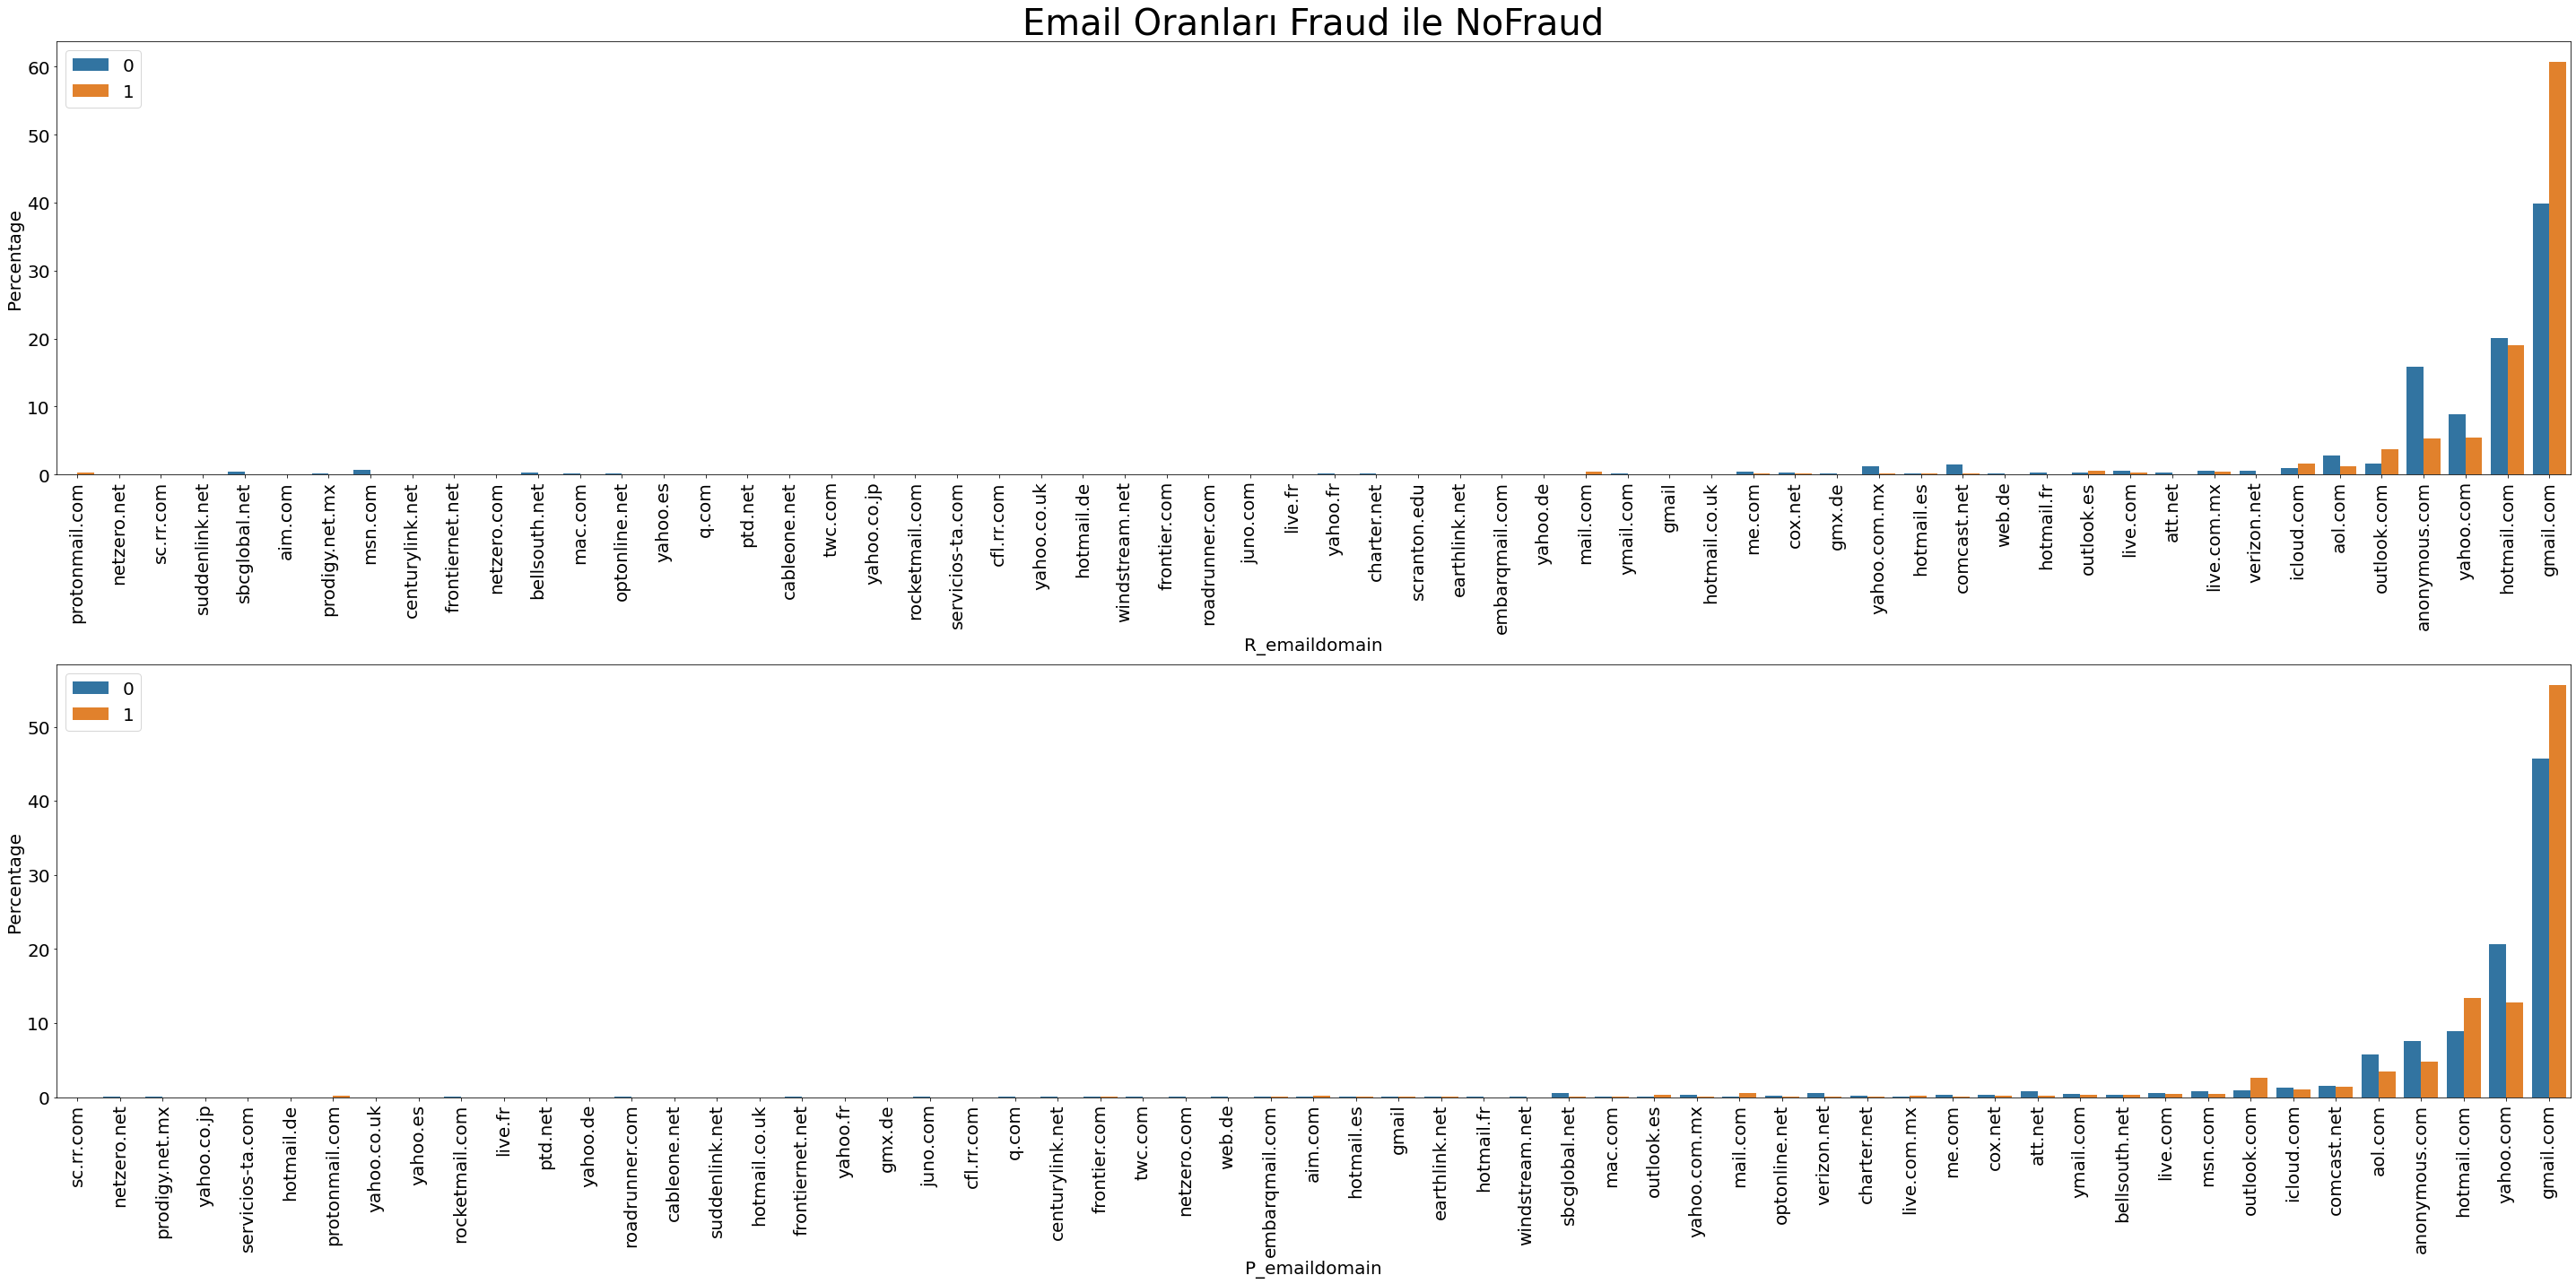

In [78]:
R_fraud_train = train[~(train["R_emaildomain"].isnull())].groupby("isFraud")["R_emaildomain"].\
                value_counts(normalize = True).rename("Percentage") * 100

R_fraud_train = pd.DataFrame(R_fraud_train).reset_index().sort_values("Percentage")

P_fraud_train = train[~(train["P_emaildomain"].isnull())].groupby("isFraud")["P_emaildomain"].\
                value_counts(normalize = True).rename("Percentage") * 100

P_fraud_train = pd.DataFrame(P_fraud_train).reset_index().sort_values("Percentage")


##########
size = 20

plt.figure(figsize = (40,20))

plt.subplot(2,1,1)
sns.barplot(x = R_fraud_train["R_emaildomain"], y = R_fraud_train["Percentage"], 
            hue = R_fraud_train["isFraud"])

plt.title("Email Oranları Fraud ile NoFraud" , size = size*2)
plt.xticks(rotation = 90 , fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("R_emaildomain" , size = size)
plt.ylabel("Percentage", size = size)
plt.legend(fontsize = size)

###########
plt.subplot(2,1,2)

sns.barplot(x = P_fraud_train["P_emaildomain"], y = P_fraud_train["Percentage"],
            hue = P_fraud_train["isFraud"])

plt.xticks(rotation = 90 , fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("P_emaildomain" , size = size)
plt.ylabel("Percentage", size = size)
plt.legend(fontsize = size)


plt.tight_layout()
plt.show()

In [79]:
train["P_emaildomain"].unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [80]:
test["P_emaildomain"].unique()

array(['gmail.com', 'aol.com', 'hotmail.com', nan, 'att.net', 'twc.com',
       'yahoo.com', 'verizon.net', 'anonymous.com', 'msn.com', 'q.com',
       'outlook.com', 'icloud.com', 'bellsouth.net', 'sbcglobal.net',
       'web.de', 'live.com.mx', 'ymail.com', 'comcast.net', 'mail.com',
       'cox.net', 'me.com', 'aim.com', 'charter.net', 'rocketmail.com',
       'outlook.es', 'centurylink.net', 'live.com', 'yahoo.de',
       'cfl.rr.com', 'mac.com', 'frontier.com', 'netzero.net',
       'frontiernet.net', 'juno.com', 'windstream.net', 'yahoo.fr',
       'netzero.com', 'optonline.net', 'yahoo.co.uk', 'cableone.net',
       'roadrunner.com', 'sc.rr.com', 'earthlink.net', 'gmail',
       'hotmail.de', 'yahoo.com.mx', 'suddenlink.net', 'yahoo.es',
       'embarqmail.com', 'hotmail.es', 'ptd.net', 'hotmail.co.uk',
       'protonmail.com', 'live.fr', 'prodigy.net.mx', 'yahoo.co.jp',
       'hotmail.fr', 'gmx.de', 'servicios-ta.com', 'scranton.edu'],
      dtype=object)

In [81]:
train.loc[:,"P_emaildomain"] = np.where(train["P_emaildomain"].isin(["gmail.com","gmail"]), 
                                        "Google", train["P_emaildomain"] )

train.loc[:,"P_emaildomain"] = np.where(train["P_emaildomain"].isin(["mac.com","icloud.com","me.com"]), 
                                        "Apple", train["P_emaildomain"] )

train.loc[:,"P_emaildomain"] = np.where(train["P_emaildomain"].isin(['yahoo.com', 'yahoo.com.mx',  
                                                                     'yahoo.co.uk','yahoo.co.jp', 
                                                                     'yahoo.de', 'yahoo.fr',
                                                                     'yahoo.es']), "Yahoo", 
                                                                     train["P_emaildomain"])

train.loc[:,"P_emaildomain"] = np.where(train["P_emaildomain"].isin(['hotmail.com','outlook.com',
                                                                     'msn.com', 'live.com.mx', 
                                                                     'hotmail.es','hotmail.co.uk', 
                                                                     'hotmail.de','outlook.es', 
                                                                     'live.com', 'live.fr',
                                                                     'hotmail.fr']), "Microsoft", 
                                                                     train["P_emaildomain"])

less_500 = pd.DataFrame(train["P_emaildomain"].value_counts().reset_index())
less_500.columns = ["email","P_emaildomain"]
index = less_500[less_500["P_emaildomain"] <= 500].email.values.tolist()

train.loc[:,"P_emaildomain"] = np.where(train["P_emaildomain"].isin(index) , "Others", train["P_emaildomain"])

train["P_emaildomain"].fillna("UnKnown",inplace = True)

In [82]:
train["P_emaildomain"].unique(), train["P_emaildomain"].isnull().sum()

(array(['UnKnown', 'Google', 'Microsoft', 'Yahoo', 'mail.com',
        'anonymous.com', 'verizon.net', 'aol.com', 'Apple', 'comcast.net',
        'optonline.net', 'cox.net', 'charter.net', 'rocketmail.com',
        'Others', 'att.net', 'ymail.com', 'sbcglobal.net', 'bellsouth.net',
        'earthlink.net'], dtype=object),
 0)

In [83]:
train.loc[:,"R_emaildomain"] = np.where(train["R_emaildomain"].isin(["gmail.com","gmail"]), 
                                        "Google", train["R_emaildomain"] )

train.loc[:,"R_emaildomain"] = np.where(train["P_emaildomain"].isin(["mac.com","icloud.com","me.com"]), 
                                        "Apple", train["P_emaildomain"] )


train.loc[:,"R_emaildomain"] = np.where(train["R_emaildomain"].isin(['yahoo.com', 'yahoo.com.mx',  
                                                                     'yahoo.co.uk','yahoo.co.jp', 
                                                                     'yahoo.de', 'yahoo.fr',
                                                                     'yahoo.es']), "Yahoo", 
                                                                     train["R_emaildomain"])

train.loc[:,"R_emaildomain"] = np.where(train["R_emaildomain"].isin(['hotmail.com','outlook.com',
                                                                     'msn.com', 'live.com.mx', 
                                                                     'hotmail.es','hotmail.co.uk', 
                                                                     'hotmail.de','outlook.es', 
                                                                     'live.com', 'live.fr',
                                                                     'hotmail.fr']), "Microsoft", 
                                                                     train["R_emaildomain"])

less_500 = pd.DataFrame(train["R_emaildomain"].value_counts().reset_index())
less_500.columns = ["email","R_emaildomain"]
index = less_500[less_500["R_emaildomain"] <= 300].email.values.tolist()

train.loc[:,"R_emaildomain"] = np.where(train["R_emaildomain"].isin(index) , "Others", train["R_emaildomain"])

train["R_emaildomain"].fillna("UnKnown",inplace = True)

In [84]:
train["R_emaildomain"].unique(), train["R_emaildomain"].isnull().sum()

(array(['UnKnown', 'Google', 'Microsoft', 'Yahoo', 'mail.com',
        'anonymous.com', 'verizon.net', 'aol.com', 'Apple', 'comcast.net',
        'optonline.net', 'cox.net', 'charter.net', 'rocketmail.com',
        'Others', 'att.net', 'ymail.com', 'sbcglobal.net', 'bellsouth.net',
        'earthlink.net'], dtype=object),
 0)

In [85]:
test.loc[:,"P_emaildomain"] = np.where(test["P_emaildomain"].isin(["gmail.com","gmail"]), 
                                        "Google", test["P_emaildomain"] )

test.loc[:,"P_emaildomain"] = np.where(test["P_emaildomain"].isin(["mac.com","icloud.com","me.com"]), 
                                        "Apple", test["P_emaildomain"] )

test.loc[:,"P_emaildomain"] = np.where(test["P_emaildomain"].isin(['yahoo.com', 'yahoo.com.mx',  
                                                                     'yahoo.co.uk','yahoo.co.jp', 
                                                                     'yahoo.de', 'yahoo.fr',
                                                                     'yahoo.es']), "Yahoo", 
                                                                     test["P_emaildomain"])

test.loc[:,"P_emaildomain"] = np.where(test["P_emaildomain"].isin(['hotmail.com','outlook.com',
                                                                     'msn.com', 'live.com.mx', 
                                                                     'hotmail.es','hotmail.co.uk', 
                                                                     'hotmail.de','outlook.es', 
                                                                     'live.com', 'live.fr',
                                                                     'hotmail.fr']), "Microsoft", 
                                                                     test["P_emaildomain"])

less_500 = pd.DataFrame(test["P_emaildomain"].value_counts().reset_index())
less_500.columns = ["email","P_emaildomain"]
index = less_500[less_500["P_emaildomain"] <= 500].email.values.tolist()

test.loc[:,"P_emaildomain"] = np.where(test["P_emaildomain"].isin(index) , "Others", test["P_emaildomain"])

test["P_emaildomain"].fillna("UnKnown",inplace = True)

In [86]:
test["P_emaildomain"].unique(), test["P_emaildomain"].isnull().sum()

(array(['Google', 'aol.com', 'Microsoft', 'UnKnown', 'att.net', 'Others',
        'Yahoo', 'verizon.net', 'anonymous.com', 'Apple', 'bellsouth.net',
        'sbcglobal.net', 'ymail.com', 'comcast.net', 'mail.com', 'cox.net',
        'charter.net', 'optonline.net'], dtype=object),
 0)

In [87]:
test.loc[:,"R_emaildomain"] = np.where(test["R_emaildomain"].isin(["gmail.com","gmail"]), 
                                        "Google", test["R_emaildomain"] )

test.loc[:,"R_emaildomain"] = np.where(test["R_emaildomain"].isin(["mac.com","icloud.com","me.com"]), 
                                        "Apple", test["R_emaildomain"] )

test.loc[:,"R_emaildomain"] = np.where(test["R_emaildomain"].isin(['yahoo.com', 'yahoo.com.mx',  
                                                                     'yahoo.co.uk','yahoo.co.jp', 
                                                                     'yahoo.de', 'yahoo.fr',
                                                                     'yahoo.es']), "Yahoo", 
                                                                     test["R_emaildomain"])

test.loc[:,"R_emaildomain"] = np.where(test["R_emaildomain"].isin(['hotmail.com','outlook.com',
                                                                     'msn.com', 'live.com.mx', 
                                                                     'hotmail.es','hotmail.co.uk', 
                                                                     'hotmail.de','outlook.es', 
                                                                     'live.com', 'live.fr',
                                                                     'hotmail.fr']), "Microsoft", 
                                                                     test["R_emaildomain"])

less_500 = pd.DataFrame(test["R_emaildomain"].value_counts().reset_index())
less_500.columns = ["email","R_emaildomain"]
index = less_500[less_500["R_emaildomain"] <= 300].email.values.tolist()

test.loc[:,"R_emaildomain"] = np.where(test["R_emaildomain"].isin(index) , "Others", test["R_emaildomain"])

test["R_emaildomain"].fillna("UnKnown",inplace = True)

In [88]:
test["R_emaildomain"].unique(), test["R_emaildomain"].isnull().sum()

(array(['UnKnown', 'Microsoft', 'Google', 'anonymous.com', 'att.net',
        'Others', 'Yahoo', 'aol.com', 'Apple', 'verizon.net', 'cox.net',
        'sbcglobal.net', 'comcast.net', 'bellsouth.net'], dtype=object),
 0)

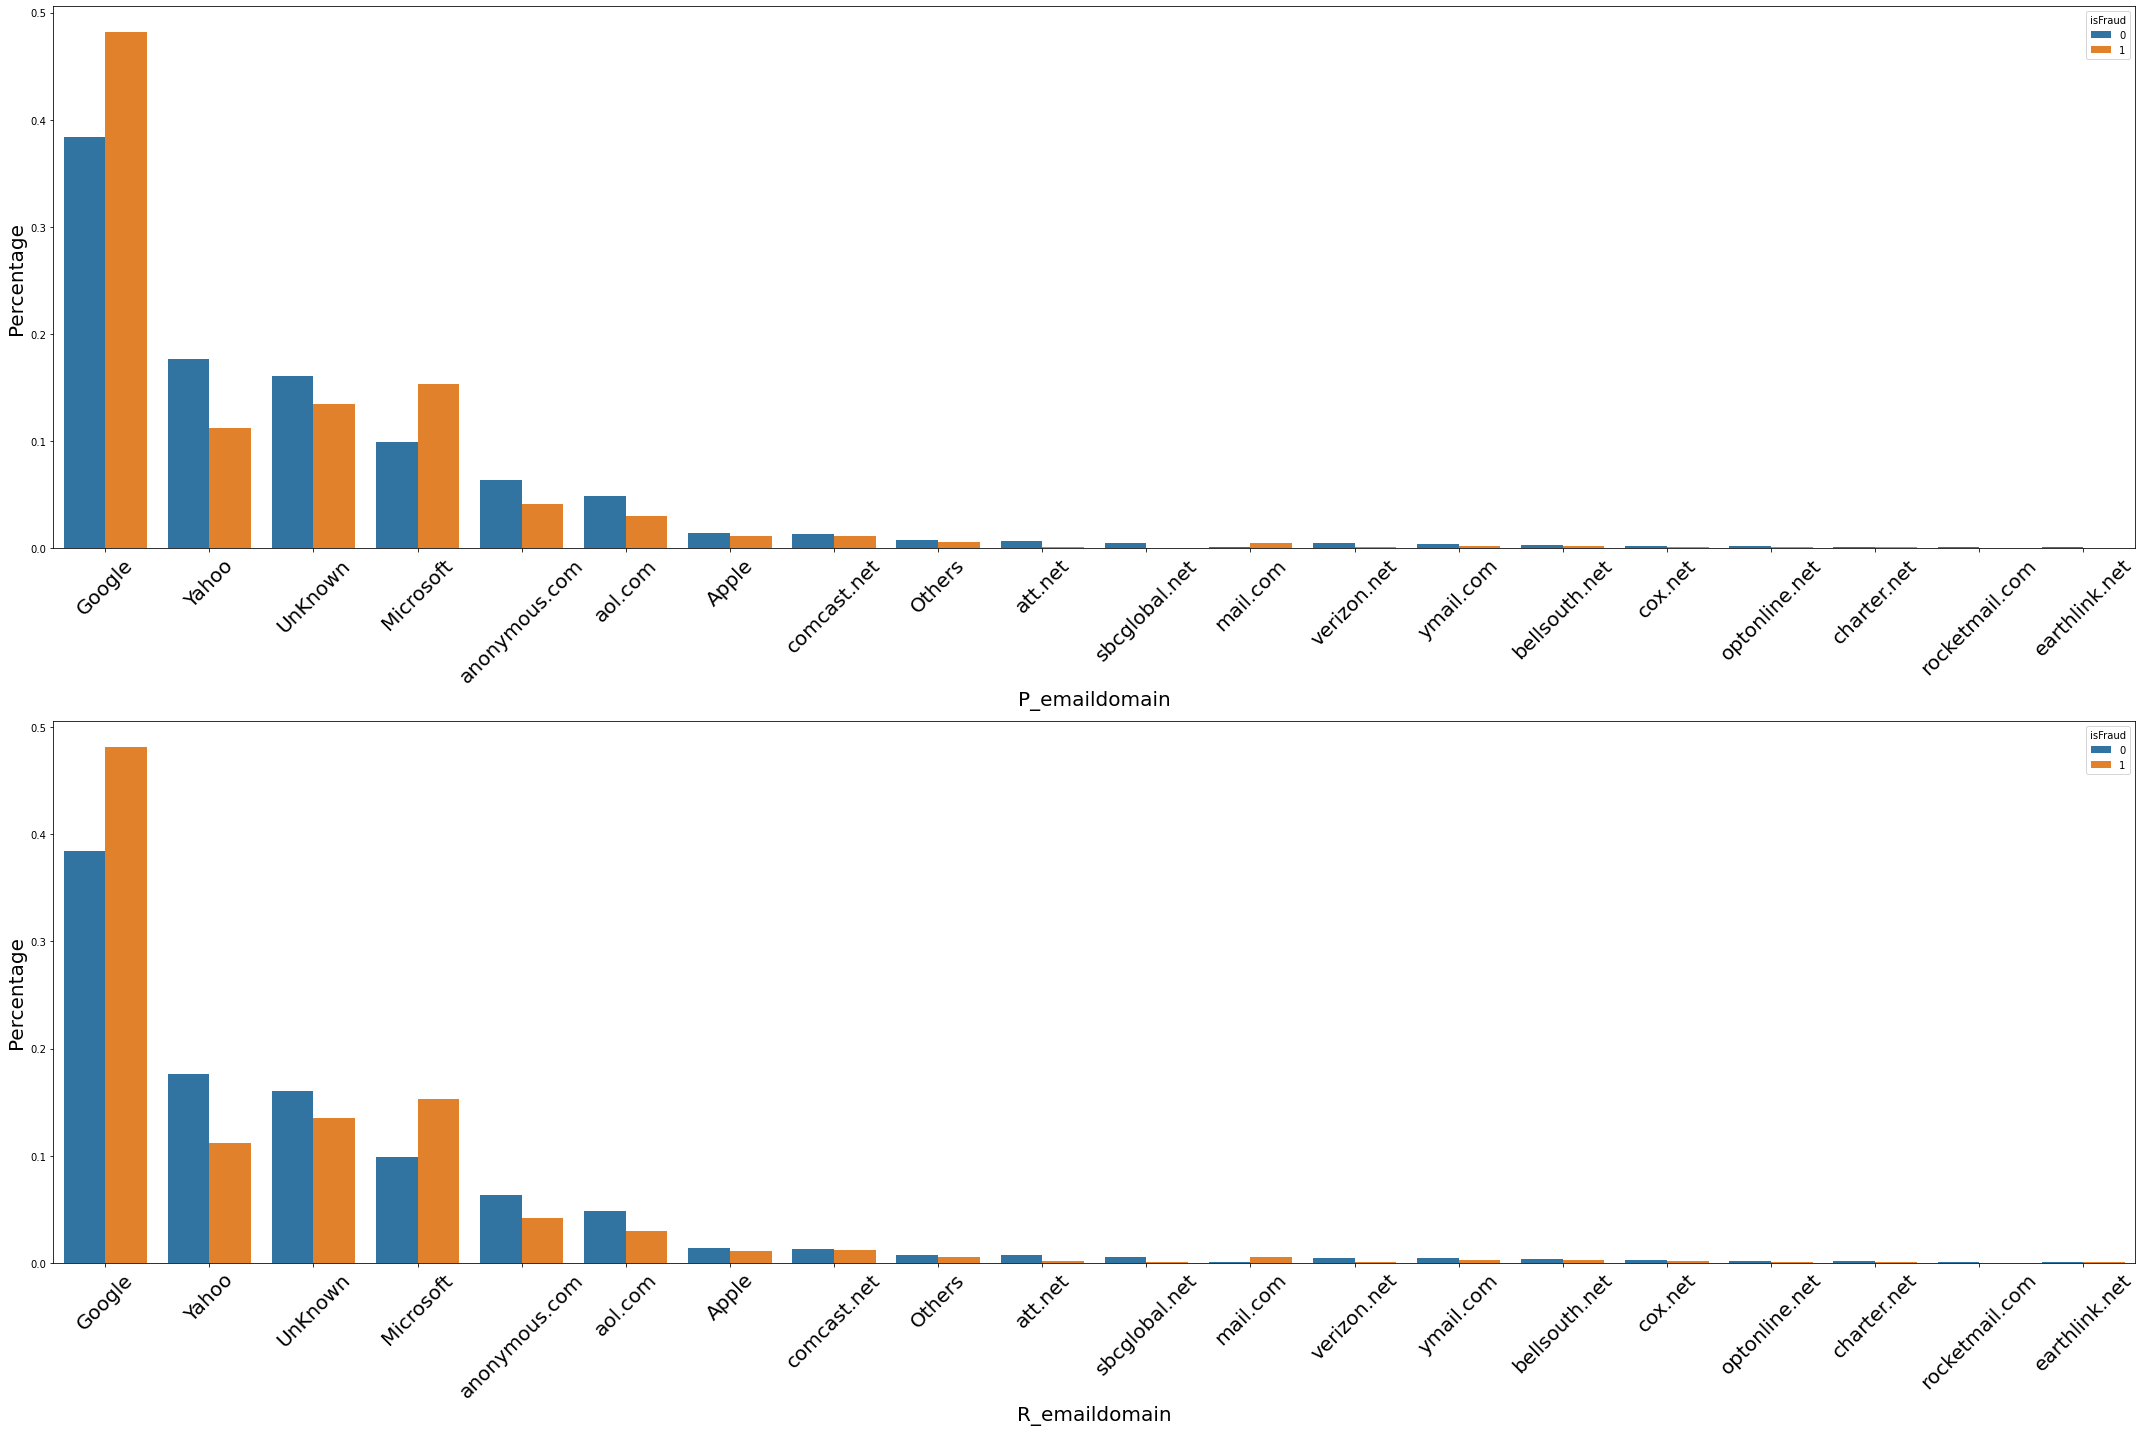

In [89]:
P_email_train = train.groupby("isFraud")["P_emaildomain"].value_counts(normalize = True).rename("Percentage")
P_email_train = pd.DataFrame(P_email_train).reset_index().sort_values("Percentage",ascending = False)

R_email_train = train.groupby("isFraud")["R_emaildomain"].value_counts(normalize = True).rename("Percentage")
R_email_train = pd.DataFrame(R_email_train).reset_index().sort_values("Percentage",ascending = False)


plt.figure(figsize = (30,20))

plt.subplot(2,1,1)
sns.barplot(P_email_train["P_emaildomain"], P_email_train["Percentage"], hue = P_email_train["isFraud"])
plt.xticks(rotation = 45 , fontsize = 20)
plt.xlabel("P_emaildomain" , size = 20)
plt.ylabel("Percentage", size = 20)

plt.subplot(2,1,2)
sns.barplot(R_email_train["R_emaildomain"], R_email_train["Percentage"], hue = R_email_train["isFraud"])
plt.xticks(rotation = 45 , fontsize = 20)
plt.xlabel("R_emaildomain" , size = 20)
plt.ylabel("Percentage", size = 20)

plt.tight_layout()
plt.show()

## C1-C14

In [90]:
#plt.figure(figsize=(20,50))
#var = ['C' + str(i) for i in range(1,15)]
#i = 1
#for col in var:
#    plt.subplot(7,4,i)
#    sns.scatterplot(x="TransactionDT",y=col,hue="isFraud",data=train[~train[col].isnull()])
#    plt.title('Train '+ col)
#    i += 1
#    plt.subplot(7,4,i)
#    sns.scatterplot(x="TransactionDT",y=col,data=test[~test[col].isnull()])
#   plt.title('Test '+ col)
#    i += 1
#plt.show()

In [91]:
#c_list = ["C"+str(i) for i in range(1,15)]

#fig , axes = plt.subplots(14,2,figsize = (20,80))

#for i in range(len(c_list)):
    
#    sns.scatterplot(x = "TransactionDT" , y = c_list[i] , data = train[~train[c_list[i]].isnull()],\
#                hue = "isFraud" , ax = axes[i][0])
#    
#    axes[i][0].set_title("TRAIN_"+c_list[i])
#    axes[i][0].legend(loc = "best")
#    
#    sns.scatterplot(x = "TransactionDT" , y = c_list[i] , data = test[~test[c_list[i]].isnull()], \
#                     ax = axes[i][1])
#    
#    axes[i][1].set_title("TEST_"+c_list[i])
    #axes[i][1].legend(loc = "best")
    
#plt.tight_layout()
#plt.show()

- Gözümüze kestirdiğimiz outliers ortadan kaldıralım 

In [92]:
train = train[~(train["C1"] > 3000)]
train = train[~(train["C2"] > 3000)]
train = train[~(train["C4"] > 1400)]
train = train[~(train["C6"] > 1400)]
train = train[~(train["C7"] > 1400)]
train = train[~(train["C8"] > 2000)]
train = train[~(train["C10"] > 2100)]
train = train[~(train["C11"] > 2000)]
train = train[~(train["C12"] > 2000)]
train = train[~(train["C13"] > 1950)]
train = train[~(train["C14"] > 900)]

In [93]:
c_list = ["C"+str(i) for i in range(1,15)]

#fig , axes = plt.subplots(14,2,figsize = (20,80))

#for i in range(len(c_list)):
    
#    sns.scatterplot(x = "TransactionDT" , y = c_list[i] , data = train[~train[c_list[i]].isnull()],\
#                hue = "isFraud" , ax = axes[i][0])
    
#    axes[i][0].set_title("TRAIN_"+c_list[i])
#    axes[i][0].legend(loc = "best")
    
#    sns.scatterplot(x = "TransactionDT" , y = c_list[i] , data = test[~test[c_list[i]].isnull()], \
#                     ax = axes[i][1])
    
#    axes[i][1].set_title("TEST_"+c_list[i])
#    #axes[i][1].legend(loc = "best")
    
#plt.tight_layout()
#plt.show()

In [94]:
for c in c_list:
    print(f"{c} Train için {train[c].isnull().sum()} değer boştur !!!")
    print(f"{c} Test için {test[c].isnull().sum()} değer boştur !!!",end = "\n\n")

C1 Train için 0 değer boştur !!!
C1 Test için 3 değer boştur !!!

C2 Train için 0 değer boştur !!!
C2 Test için 3 değer boştur !!!

C3 Train için 0 değer boştur !!!
C3 Test için 3 değer boştur !!!

C4 Train için 0 değer boştur !!!
C4 Test için 3 değer boştur !!!

C5 Train için 0 değer boştur !!!
C5 Test için 3 değer boştur !!!

C6 Train için 0 değer boştur !!!
C6 Test için 3 değer boştur !!!

C7 Train için 0 değer boştur !!!
C7 Test için 3 değer boştur !!!

C8 Train için 0 değer boştur !!!
C8 Test için 3 değer boştur !!!

C9 Train için 0 değer boştur !!!
C9 Test için 3 değer boştur !!!

C10 Train için 0 değer boştur !!!
C10 Test için 3 değer boştur !!!

C11 Train için 0 değer boştur !!!
C11 Test için 3 değer boştur !!!

C12 Train için 0 değer boştur !!!
C12 Test için 3 değer boştur !!!

C13 Train için 0 değer boştur !!!
C13 Test için 4748 değer boştur !!!

C14 Train için 0 değer boştur !!!
C14 Test için 3 değer boştur !!!



## D1 - D15

In [95]:
d_list = ["D"+str(i) for i in range(1,16)]

for d in d_list:
    print(f"{d} Train için %{train[d].isnull().sum() / len(train) * 100} değer boştur !!!")
    print(f"{d} Test için %{test[d].isnull().sum() / len(test) * 100} değer boştur !!!",end = "\n\n")


D1 Train için %0.2150792776454836 değer boştur !!!
D1 Test için %1.1902717829998954 değer boştur !!!

D2 Train için %47.528961128106914 değer boştur !!!
D2 Test için %46.33376160223884 değer boştur !!!

D3 Train için %44.501919442726035 değer boştur !!!
D3 Test için %40.0918903236884 değer boştur !!!

D4 Train için %28.628255213850494 değer boştur !!!
D4 Test için %15.167232100037301 değer boştur !!!

D5 Train için %52.46900502529597 değer boştur !!!
D5 Test için %44.28241275254543 değer boştur !!!

D6 Train için %87.6806521868088 değer boştur !!!
D6 Test için %75.37295906183454 değer boştur !!!

D7 Train için %93.44660728964517 değer boştur !!!
D7 Test için %88.13221470284651 değer boştur !!!

D8 Train için %87.34133877952256 değer boştur !!!
D8 Test için %85.32873092279121 değer boştur !!!

D9 Train için %87.34133877952256 değer boştur !!!
D9 Test için %85.32873092279121 değer boştur !!!

D10 Train için %12.798657661245901 değer boştur !!!
D10 Test için %2.47586793528995 değer boştur

In [96]:
for d in d_list:
    print(d, "-->" ,train[d].unique())

D1 --> [ 14.   0. 112.  61.   1.  72.  46.  62. 485.  66. 169.  29. 121. 245.
 201. 478. 542. 181.  91.   3. 108. 394.  21.   5.  36.  12. 104. 464.
 238. 239.  47. 456. 216.  78.  31. 404.  57.   9.  40. 429. 119.  41.
 250.  56. 416.  37. 369. 157. 164.  10.  59. 248. 453. 457. 125. 217.
   8.  32. 146. 358.  60. 154. 151.  94.  30.  93.  11. 483.  83.  86.
 163. 234. 343.  51. 102. 480. 318. 463. 172. 379. 153. 142. 339. 322.
 127. 303.  48.  64.  22.  79. 257. 213.   6.  27. 107. 265. 117. 462.
 139.  90. 174.  19. 223. 333. 411. 451. 128.  77. 140. 420.   4.  89.
  50. 298.  17. 290. 129.  15. 150. 471. 380. 165.   2. 242. 484. 103.
 320. 479.  26. 291. 305.  92.  23.  58. 424.  70.  42. 368. 352. 256.
  84. 383.  39. 308.  75. 111. 231. 328.  88. 173. 361. 166. 294. 313.
 475. 155. 481.  38. 135. 203. 101.  44. 233. 126. 365.  81.  74. 426.
  63.  55. 266. 399.  76. 159. 277. 350. 197. 130. 196. 212. 113. 143.
 227. 247. 182. 148. 458. 469. 267. 387.  71.  24. 470. 109.  54. 168.

D14 --> [  nan    0.   98.   97.    2.   18.   50.  386.  301.  337.   46.   87.
  164.  298.  244.  369.  123.  368.   21.   13.   22.   71.  170.    1.
   57.  328.  327.  230.  696.   17.  330.   36.    3.  204.  498.  543.
  375.  178.  598.  361.  189.  197.  147.  253. -193.  112.   86.  595.
  241.  214.  693.  306.  -83.  268.  259.   33.  255.  437.  309.  323.
  163.  152.  363.   34.   84.  277.  252.  332.   24.   16.  380.  453.
  364.  440.  114.  250.  263.  124.   44.  286.  353.  155.   35.  136.
   88.  347.   61.  372.  212.   29.   60.  443.  585.  258.  226.    8.
   95.  344.  243.   23.  143.   51.  345.   65.  340.  545.  394.  307.
    7.  209.   89.  418.  351.  465.   20.  385.  501.  605.    6.  295.
  283.  213.    4.  467.  317.   72.  362.  382.  236.  173.  119.  700.
  276.  692.  269.  430.   25.   49.  487.  348.  233.  247.  376.    9.
  356.  370.  659.  245.  355.  300.  166.   27.  537.  455.   90.  231.
   15.  365.    5.  672.  391.  239.  271. 

In [97]:
#fig , axes = plt.subplots(15,2,figsize = (20,80))

#for i in range(len(d_list)):
    
#    sns.scatterplot(x = "TransactionDT" , y = d_list[i] , data = train[~train[d_list[i]].isnull()],\
#                    hue = "isFraud" , ax = axes[i][0])
    
#    axes[i][0].set_title("TRAIN_"+d_list[i])
#    axes[i][0].legend(loc = "best")
    
#    sns.scatterplot(x = "TransactionDT" , y = d_list[i] , data = test[~test[d_list[i]].isnull()], \
#                    ax = axes[i][1])
    
#    axes[i][1].set_title("TEST_"+d_list[i])
#    #axes[i][1].legend(loc = "best")
    
#plt.tight_layout()
#plt.show()

- D1-15 : Önceki Işlem Arasındaki Günler Vb. Gibi Zaman Deltası
- Burda TransactionDT arttığında D özelliğinin arttığını gözlemlemekteyiz...
- Herhangi bir aykırı bir değer var varsa da görmezden gelenebilir ...
- Her biri için ( D1-15) %40 fazla eksik değer vardır..

## M1-M9

- Karttaki Isimler Ve Adres Vb. Gibi Eşleşme

In [98]:
m_list = ["M"+str(i) for i in range(1,10)]

for m in m_list:
    print(f"{m} Train için % {(train[m].isnull().sum() / len(train )*100)}")
    print(f"{m} Test için % {(test[m].isnull().sum() / len(test)) *100}",end= "\n\n")

M1 Train için % 45.86086794403532
M1 Test için % 34.861286267172694

M2 Train için % 45.86086794403532
M2 Test için % 34.861286267172694

M3 Train için % 45.86086794403532
M3 Test için % 34.861286267172694

M4 Train için % 47.69997372948146
M4 Test için % 46.92110181550491

M5 Train için % 59.314424209554
M5 Test için % 61.10864412432824

M6 Train için % 28.617238544782758
M6 Test için % 31.36803298262649

M7 Train için % 58.60003559231545
M7 Test için % 46.38290397895364

M8 Train için % 58.5978322585019
M8 Test için % 46.38014095375683

M9 Train için % 58.5978322585019
M9 Test için % 46.38014095375683



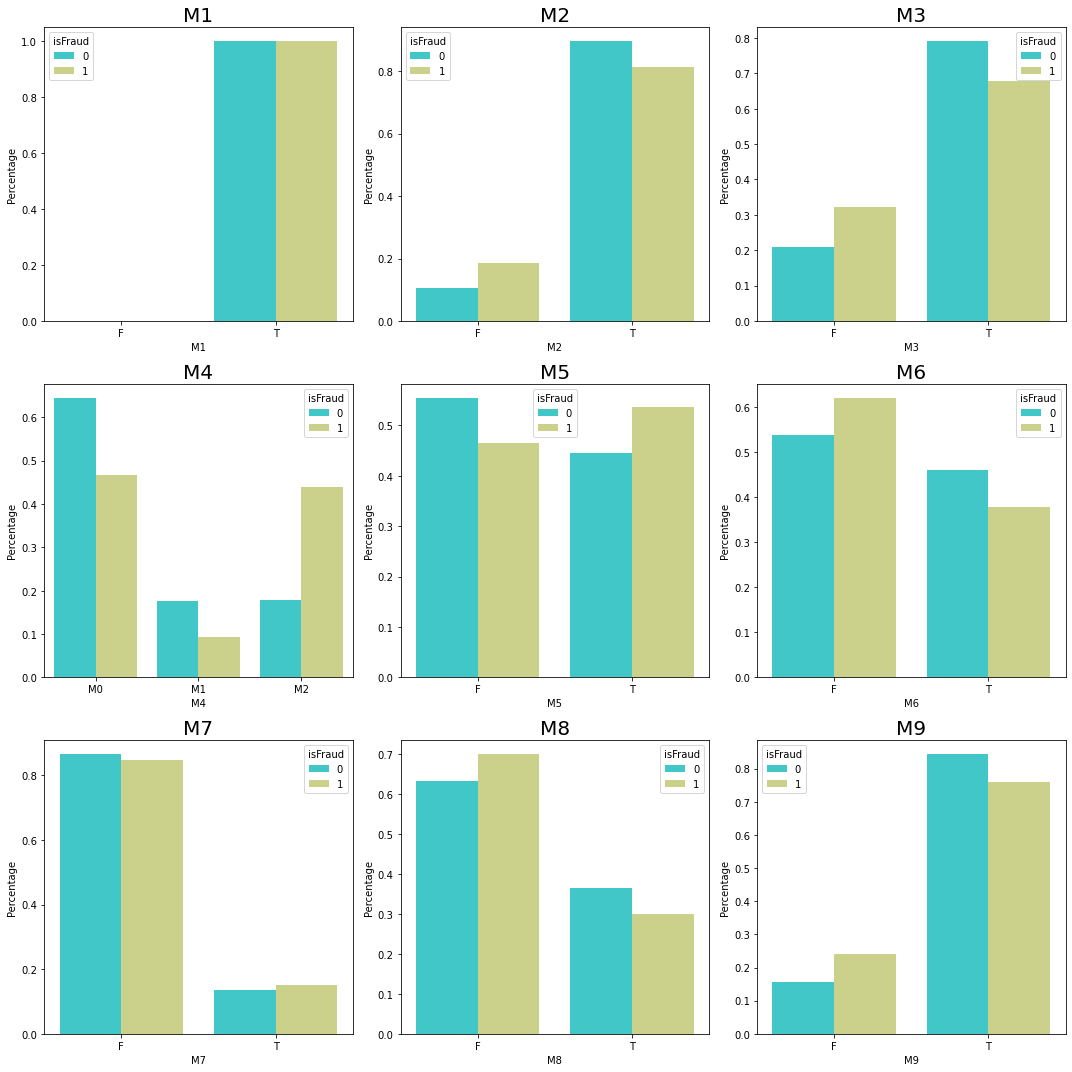

In [99]:
plt.figure(figsize = (15,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    
    m_train = train.groupby("isFraud")[m_list[i-1]].value_counts(normalize = True).rename("Percentage")
    m_train = pd.DataFrame(m_train).reset_index().sort_values(m_list[i-1])
    
    sns.barplot(x = m_list[i-1] , y = "Percentage" , data = m_train , palette = "rainbow",hue = "isFraud")
    plt.title(m_list[i-1], size = 20)

plt.tight_layout()
plt.show()

## V Features

- Vesta, sıralama, sayma ve diğer varlık ilişkileri dahil olmak üzere zengin özellikler tasarladı.

In [100]:
# Yukarda çıkarmıştık!!!
v_list = ["V"+str(i) for i in range(1,340) if i != 107]
v_list.append("TransactionDT")

#plt.figure(figsize = (15,15))
#sns.heatmap(train[v_list].corr(),cmap = "viridis", annot = False , center = 0.00)
#plt.title("V1-V339", fontsize = 20)
#plt.show()

## id01-id38

In [101]:
id_list = [col for col in train.loc[: , train.columns.str.contains("id")].columns]

for i in id_list:
    
    print(i,"->" ,train[i].unique(),end="\n\n" )

id_01 -> [  nan    0.   -5.  -15.  -10.  -20.  -40.  -30.  -25.  -55.  -45.  -70.
  -90. -100.  -65.  -60.  -75.  -72.  -50.  -21.  -35.  -85.  -64.  -80.
  -95.  -87.  -58.   -7.  -12.  -11.   -9.  -27.  -42.   -6.  -62.  -18.
  -76.  -23.  -19.  -99.  -13.  -26.  -31.  -17.  -22.  -14.  -34.  -54.
  -53.  -28.  -88.  -16.  -61.  -46.  -94.  -24.  -93.  -44.  -89.  -92.
  -37.  -96.  -57.  -29.  -33.  -32.   -8.  -52.  -43.  -38.  -86.  -47.
  -82.  -48.  -63.  -71.  -56.  -51.]

id_02 -> [    nan  70787.  98945. ... 172059. 632381.  55528.]

id_03 -> [ nan   0.   3.   2.   5.   1.   6.   9.   4.  -5.  -9.  -2.  -4.  -1.
  -3.  -7.  -6.   7.  -8.  10. -11. -10.   8. -12. -13.]

id_04 -> [ nan   0. -11.  -5.  -8.  -1.  -6.  -9.  -3. -13.  -4. -10.  -7. -12.
  -2. -28.]

id_05 -> [ nan   0.   1.   3.   2.   9.  12.   6.   4.  21.   7.   5.  18.  17.
  -1.  11.   8.  10. -10.  -8.  40.  13.  19.  -3.  14.  22.  -4.  15.
  23.  24.  -2.  41.  20.  -5.  31.  50.  -9.  25.  27.  -7.  33. -2

id_28 -> [nan 'New' 'Found']

id_29 -> [nan 'NotFound' 'Found']

id_30 -> [nan 'Android 7.0' 'iOS 11.1.2' 'Mac OS X 10_11_6' 'Windows 10' 'Android'
 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista'
 'iOS 10.3.2' 'iOS 11.0.2' 'Mac OS X 10.11' 'Android 8.0.0' 'iOS 10.2.0'
 'iOS 10.2.1' 'iOS 11.0.0' 'Mac OS X 10.10' 'Mac OS X 10_12_3'
 'Mac OS X 10_12' 'Android 6.0.1' 'iOS' 'Mac OS X 10.13'
 'Mac OS X 10_12_5' 'Mac OS X 10_8_5' 'iOS 11.0.1' 'iOS 10.0.2'
 'Android 5.0.2' 'Windows XP' 'iOS 11.2.0' 'Mac OS X 10.6' 'Windows 8'
 'Mac OS X 10_6_8' 'Mac OS X 10_11_4' 'Mac OS X 10_12_1' 'iOS 10.1.1'
 'Mac OS X 10_11_3' 'Mac OS X 10_12_4' 'Mac OS X 10_13_2' 'Android 4.4.2'
 'Mac OS X 10_12_2' 'Android 5.0' 'func' 'Android 7

In [102]:
my_self_cat_cols = [12,15,16,23,27,28,29,30,31,33,34,35,36,37,38]

cat_cols = [col for col in train.loc[: , train.columns.str.contains("id")].columns 
            if train[col].dtype == "object"]

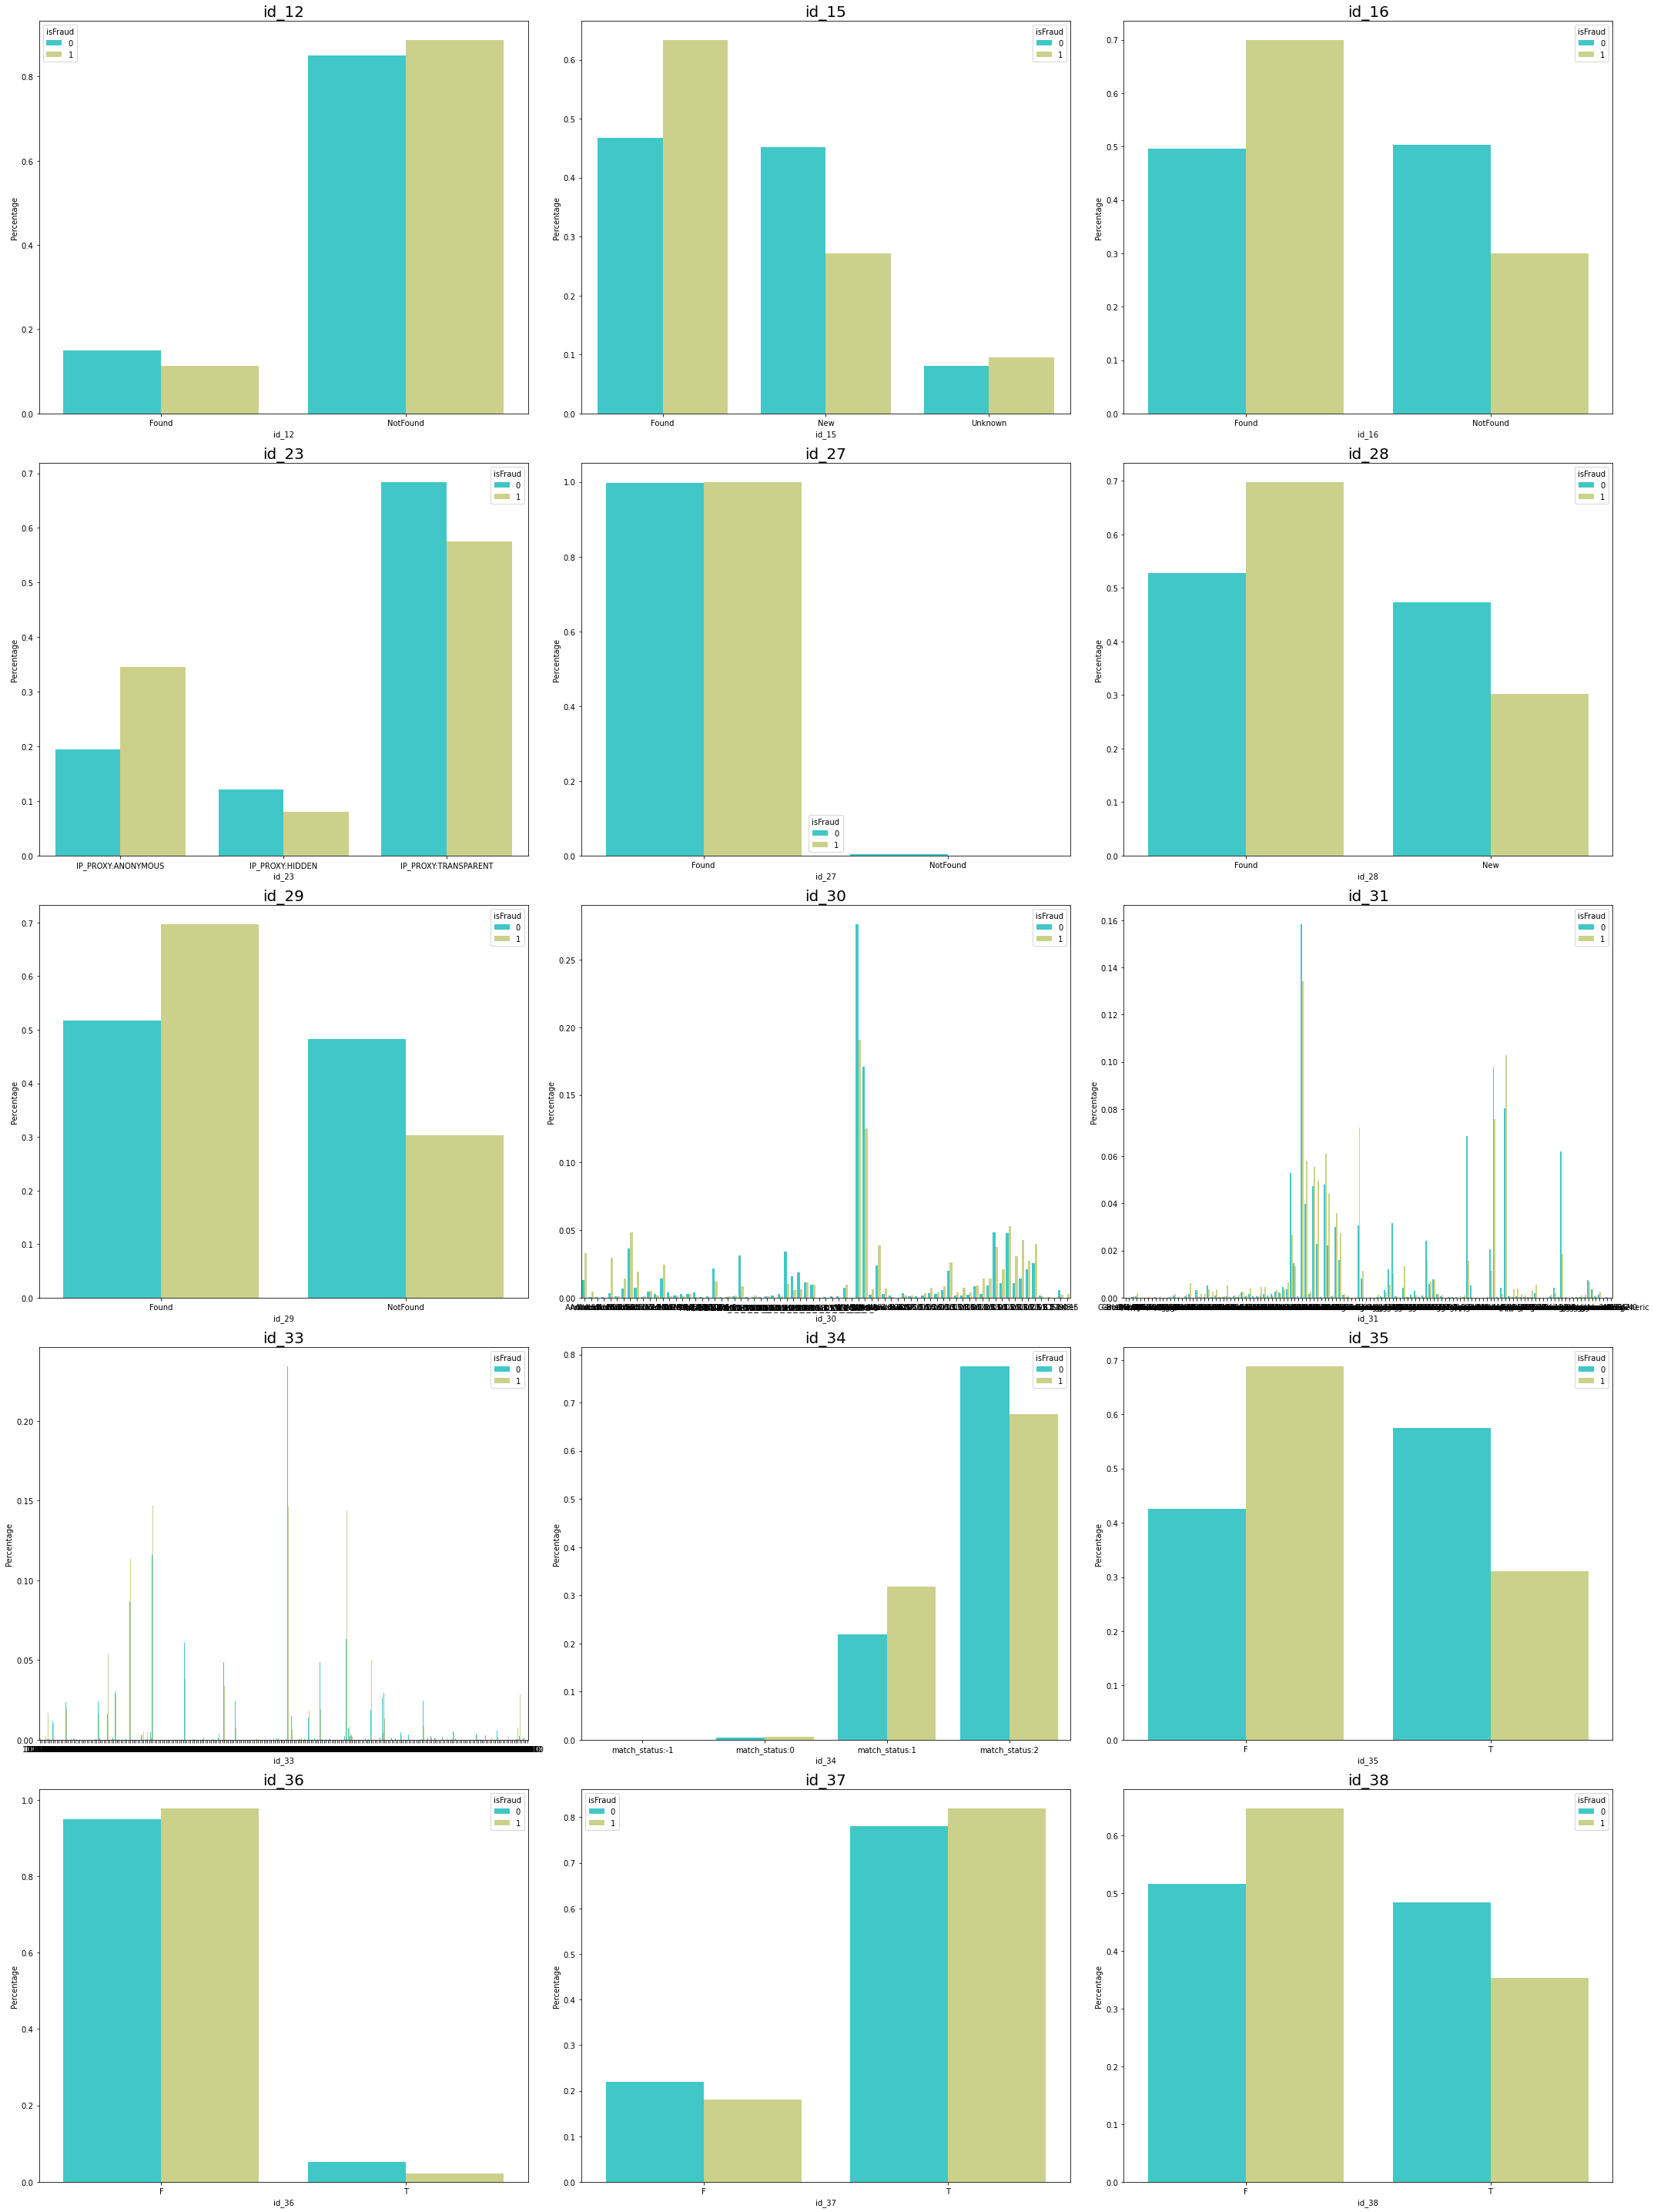

In [103]:
plt.figure(figsize = (30,40))
for i in range(1,16):
    
    plt.subplot(5,3,i)
    
    train_id = train.groupby("isFraud")[cat_cols[i-1]].value_counts(normalize = True).rename("Percentage")
    train_id = pd.DataFrame(train_id).reset_index().sort_values(cat_cols[i-1])
    sns.barplot(x = cat_cols[i-1], y = "Percentage", hue = "isFraud", 
                data = train_id, palette = "rainbow")
    plt.title(cat_cols[i-1],fontsize = 20)
    #plt.xticks(rotation = 45)
    
plt.tight_layout()
plt.show()

In [104]:
train["id_30"].value_counts().head(5)

Windows 10     21154
Windows 7      13110
iOS 11.2.1      3722
iOS 11.1.2      3699
Android 7.0     2871
Name: id_30, dtype: int64

In [105]:
train["id_30"].unique()

array([nan, 'Android 7.0', 'iOS 11.1.2', 'Mac OS X 10_11_6', 'Windows 10',
       'Android', 'Linux', 'iOS 11.0.3', 'Mac OS X 10_7_5',
       'Mac OS X 10_12_6', 'Mac OS X 10_13_1', 'iOS 11.1.0',
       'Mac OS X 10_9_5', 'Windows 7', 'Windows 8.1', 'Mac', 'iOS 10.3.3',
       'Mac OS X 10.12', 'Mac OS X 10_10_5', 'Mac OS X 10_11_5',
       'iOS 9.3.5', 'Android 5.1.1', 'Android 7.1.1', 'Android 6.0',
       'iOS 10.3.1', 'Mac OS X 10.9', 'iOS 11.1.1', 'Windows Vista',
       'iOS 10.3.2', 'iOS 11.0.2', 'Mac OS X 10.11', 'Android 8.0.0',
       'iOS 10.2.0', 'iOS 10.2.1', 'iOS 11.0.0', 'Mac OS X 10.10',
       'Mac OS X 10_12_3', 'Mac OS X 10_12', 'Android 6.0.1', 'iOS',
       'Mac OS X 10.13', 'Mac OS X 10_12_5', 'Mac OS X 10_8_5',
       'iOS 11.0.1', 'iOS 10.0.2', 'Android 5.0.2', 'Windows XP',
       'iOS 11.2.0', 'Mac OS X 10.6', 'Windows 8', 'Mac OS X 10_6_8',
       'Mac OS X 10_11_4', 'Mac OS X 10_12_1', 'iOS 10.1.1',
       'Mac OS X 10_11_3', 'Mac OS X 10_12_4', 'Mac OS X 10

In [106]:
def OS(dataframe):
    
    #word = word.fillna("unknown")
    
    word = dataframe
    
    if str(word).isalpha():
        
        return word
    
    else:
        
        result = " ".join(str(word).split(" ")[:-1])
        
        return result
    
def Version(dataframe):
    
    word = dataframe
    
    result = "".join(str(word).split(" ")[-1])
    
    if result.isalpha():
        
        return 0
    
    else:
        
        return result
      

In [107]:
train["id_30"].fillna("unknown",inplace = True)
test["id-30"].fillna("unknown", inplace = True) 

train["OS_id_30"] = train["id_30"].apply(OS)
train["Version_id_30"] = train["id_30"].apply(Version)

test["OS_id_30"] = test["id-30"].apply(OS)
test["Version_id_30"] = test["id-30"].apply(Version)

In [108]:
train[["id_31","OS_id_30","Version_id_30"]].dtypes

id_31            object
OS_id_30         object
Version_id_30    object
dtype: object

In [109]:
test[["id-31","OS_id_30","Version_id_30"]].dtypes

id-31            object
OS_id_30         object
Version_id_30    object
dtype: object

In [110]:
train[["id_31","OS_id_30","Version_id_30"]].isnull().sum()

id_31            450173
OS_id_30              0
Version_id_30         0
dtype: int64

In [111]:
test[["id-31","OS_id_30","Version_id_30"]].isnull().sum()

id-31            370066
OS_id_30              0
Version_id_30         0
dtype: int64

In [112]:
train["id_31"].unique()

array([nan, 'samsung browser 6.2', 'mobile safari 11.0', 'chrome 62.0',
       'chrome 62.0 for android', 'edge 15.0', 'mobile safari generic',
       'chrome 49.0', 'chrome 61.0', 'edge 16.0', 'safari generic',
       'edge 14.0', 'chrome 56.0 for android', 'firefox 57.0',
       'chrome 54.0 for android', 'mobile safari uiwebview', 'chrome',
       'chrome 62.0 for ios', 'firefox', 'chrome 60.0 for android',
       'mobile safari 10.0', 'chrome 61.0 for android',
       'ie 11.0 for desktop', 'ie 11.0 for tablet', 'mobile safari 9.0',
       'chrome generic', 'other', 'chrome 59.0 for android',
       'firefox 56.0', 'android webview 4.0', 'chrome 55.0', 'opera 49.0',
       'ie', 'chrome 55.0 for android', 'firefox 52.0',
       'chrome 57.0 for android', 'chrome 56.0',
       'chrome 46.0 for android', 'chrome 58.0', 'firefox 48.0',
       'chrome 59.0', 'samsung browser 4.0', 'edge 13.0',
       'chrome 53.0 for android', 'chrome 58.0 for android',
       'chrome 60.0', 'mobile sa

In [113]:
import re
metin = "samsung browser 6.2"
metin2 = "deneme"
regex = r"[\d.]"

len("".join(re.findall(regex, metin)))

3

In [114]:
def Version(words):
    
    words = str(words)
    import re
    regex = r"[\d.]"
    result = "".join(re.findall(regex,words))
    
    if len(result) > 0 :
        return result
    else:
        return "UnKnown"

In [115]:
deneme = train[["id_31"]]
deneme["Version_id_31"] = deneme["id_31"].apply(Version)
deneme[["Version_id_31", "id_31"]].head(50)

/Users/gokhanersoz/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Version_id_31,id_31
0,UnKnown,NaN
1,UnKnown,NaN
2,UnKnown,NaN
3,UnKnown,NaN
4,6.2,samsung browser 6.2
5,UnKnown,NaN
6,UnKnown,NaN
7,UnKnown,NaN
8,11.0,mobile safari 11.0
9,UnKnown,NaN


In [116]:
train["id_31"].fillna("unknown",inplace = True)
test["id-31"].fillna("unknown",inplace = True)

train["Browser_id_31"]  = train["id_31"].str.split(" " , expand = True)[0]
train["Version_id_31"] = train["id_31"].apply(Version)

test["Browser_id_31"]  = test["id-31"].str.split(" " , expand = True)[0]
test["Version_id_31"] = test["id-31"].apply(Version)

In [117]:
train[["id_31","Browser_id_31","Version_id_31"]].dtypes

id_31            object
Browser_id_31    object
Version_id_31    object
dtype: object

In [118]:
test[["id-31","Browser_id_31","Version_id_31"]].dtypes

id-31            object
Browser_id_31    object
Version_id_31    object
dtype: object

In [119]:
train[["id_31","Browser_id_31","Version_id_31"]].isnull().sum()

id_31            0
Browser_id_31    0
Version_id_31    0
dtype: int64

In [120]:
test[["id-31","Browser_id_31","Version_id_31"]].isnull().sum()

id-31            0
Browser_id_31    0
Version_id_31    0
dtype: int64

In [121]:
train["id_33"].fillna("unknownxunknown",inplace = True)
test["id-33"].fillna("unknownxunknown",inplace = True)

train["Width_id_33"] = train["id_33"].str.split("x", expand = True)[0]
train["Height_id_33"] = train["id_33"].str.split("x", expand = True)[1]

test["Width_id_33"] = test["id-33"].str.split("x", expand = True)[0]
test["Height_id_33"] = test["id-33"].str.split("x", expand = True)[1]

In [122]:
train[["id_33","Width_id_33","Height_id_33"]].dtypes

id_33           object
Width_id_33     object
Height_id_33    object
dtype: object

In [123]:
train[["id_33","Width_id_33","Height_id_33"]].isnull().sum()

id_33           0
Width_id_33     0
Height_id_33    0
dtype: int64

In [124]:
test[["id-33","Width_id_33","Height_id_33"]].dtypes

id-33           object
Width_id_33     object
Height_id_33    object
dtype: object

In [125]:
test[["id-33","Width_id_33","Height_id_33"]].isnull().sum()

id-33           0
Width_id_33     0
Height_id_33    0
dtype: int64

## Denemeler yanılmalara yapabilirsin çünkü hata çıkabilir !!!!

## DeviceType and DeviceInfo

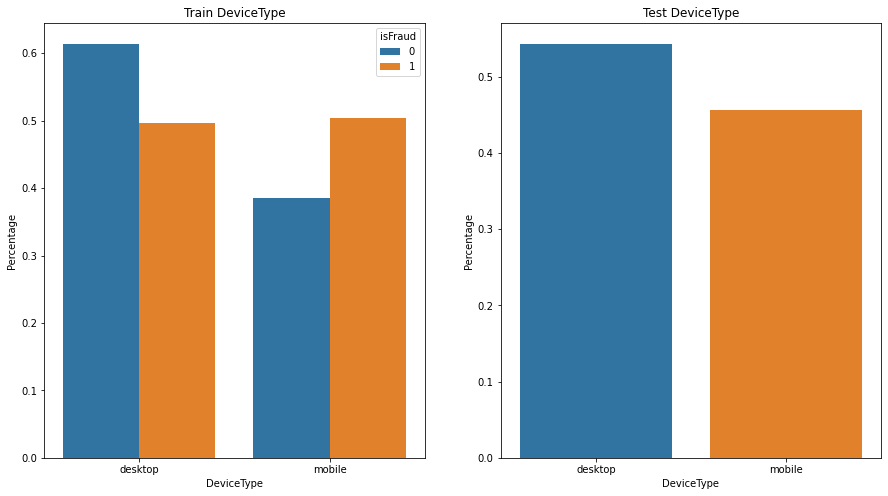

In [126]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
train_type = train[~(train["DeviceType"].isnull())].groupby("isFraud")["DeviceType"].\
             value_counts(normalize = True).rename("Percentage")

train_type = pd.DataFrame(train_type).reset_index().sort_values("DeviceType")

sns.barplot(x = "DeviceType", y = "Percentage", hue = "isFraud", data = train_type)
plt.title("Train DeviceType")

plt.subplot(1,2,2)

test_type = test[~(test["DeviceType"].isnull())]["DeviceType"].\
             value_counts(normalize = True).rename("Percentage")

test_type = pd.DataFrame(test_type).reset_index()
test_type.columns = ["DeviceType", "Percentage"]
test_type = test_type.sort_values("DeviceType")


sns.barplot(x = "DeviceType", y = "Percentage", data = test_type)
plt.title("Test DeviceType")

plt.show()

- Her iki platformdada aynı FRAUD oranı var !!!!

In [127]:
train["DeviceInfo"].fillna("UnKnown", inplace = True)
test["DeviceInfo"].fillna("UnKnown", inplace = True)

In [128]:
train["DeviceInfo"].isnull().sum(),test["DeviceInfo"].isnull().sum()

(0, 0)

In [129]:
train["DeviceInfo"].value_counts()

UnKnown                          471672
Windows                           47569
iOS Device                        19781
MacOS                             12573
Trident/7.0                        7428
                                  ...  
ASUS_Z00UD                            1
DASH                                  1
SAMSUNG-SGH-I537                      1
SAMSUNG SM-G950U1 Build/R16NW         1
SM-G950U1 Build/R16NW                 1
Name: DeviceInfo, Length: 1785, dtype: int64

In [130]:
def device_transform(data):
    
    #data["DeviceInfo"] = data["DeviceInfo"].fillna("UnKnown_Device").str
    
    data.loc[:, "DeviceCorp"] = data["DeviceInfo"].str.split("/", expand= True)[0]
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("rv:",na = False) , 
                                         "RV" , data["DeviceCorp"])    
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("SM-",na = False) , 
                                         "SAMSUNG" , data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("SAMSUNG",na = False) , 
                                         "SAMSUNG" , data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("GT-",na = False) , 
                                         "SAMSUNG" , data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("HONOR",na = False) , 
                                         "HUAWEI" , data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("ALE-",na = False) , 
                                         "HUAWEI" , data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("-L",na = False) , 
                                         "HUAWEI" , data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("iOS",na = False) , 
                                         "APPLE" , data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("MacOS",na = False) , 
                                         "APPLE" , data["DeviceCorp"])

    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("Idea",na = False) , 
                                         "LENOVO" , data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("TA",na = False) , 
                                         "LENOVO", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("Moto",na = False) , 
                                         "MOTO", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("moto",na = False) , 
                                         "MOTO", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("Moto G",na = False) , 
                                         "MOTO", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("XT",na = False) , 
                                         "MOTO", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("Edison",na = False) , 
                                         "MOTO", data["DeviceCorp"])
        
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("MI",na = False) , 
                                         "XIAOMI", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("Mi",na = False) , 
                                         "XIAOMI", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("Redmi",na = False) , 
                                         "XIAOMI", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("VS",na = False) , 
                                         "LG", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("LG",na = False) , 
                                         "LG", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("EGO",na = False) , 
                                         "LG", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("ALCATEL",na = False) , 
                                         "ALCATEL", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("ONE TOUCH",na = False) , 
                                         "ALCATEL", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("ONE A",na = False) , 
                                         "ONEPLUS", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("OPR6",na = False) , 
                                         "HTC", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("HTC",na = False) , 
                                         "HTC", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("Nexus",na = False) , 
                                         "GOOGLE", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("Pixel",na = False) , 
                                         "GOOGLE", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("STV",na = False) , 
                                         "BLACKBERRY", data["DeviceCorp"])

    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("ASUS",na = False) , 
                                         "ASUS", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("BLADE",na = False) , 
                                         "ZTE", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.contains("Blade",na = False) , 
                                         "ZTE", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].isin(["rv","SM","GT","SGH"]),
                                         "SAMSUNG", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.startswith("Z",na = False), 
                                         "ZTE", data["DeviceCorp"])
    
    data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.startswith("KF",na = False), 
                                         "AMAZON", data["DeviceCorp"])    
    
    for i in ['D', 'E', 'F', 'G']:
    
        data.loc[:, "DeviceCorp"] = np.where(data["DeviceCorp"].str.startswith(i,na = False), 
                                         "SONY", data["DeviceCorp"]) 
    
    data["DeviceCorp"] = data["DeviceCorp"].str.upper()
    
    less_200 = pd.DataFrame(data["DeviceCorp"].value_counts()).reset_index()
    less_200.columns = ["Device" , "DeviceCorp"]
    less_200 = less_200[less_200["DeviceCorp"] < 200]["Device"].tolist()
    
    data.loc[: , "DeviceCorp"] = np.where(data["DeviceCorp"].isin(less_200), 
                                          "OTHERS" , data["DeviceCorp"])
    
    data["DeviceCorp"] = data["DeviceCorp"].fillna("UnKnown_Device".upper())
    
    
    return data

In [131]:
train["DeviceInfo"].fillna("UnKnown_Device",inplace=True)
test["DeviceInfo"].fillna("UnKnown_Device",inplace=True)

In [132]:
train = device_transform(train)
test = device_transform(test)

In [133]:
train["DeviceCorp"].unique()

array(['UNKNOWN', 'SAMSUNG', 'APPLE', 'WINDOWS', 'ZTE', 'MOTO', 'XIAOMI',
       'OTHERS', 'RV', 'LG', 'TRIDENT', 'HUAWEI', 'SONY', 'AMAZON', 'HTC',
       'LENOVO'], dtype=object)

In [134]:
test["DeviceCorp"].unique()

array(['UNKNOWN', 'HUAWEI', 'LG', 'TRIDENT', 'SAMSUNG', 'APPLE',
       'WINDOWS', 'OTHERS', 'AMAZON', 'MOTO', 'XIAOMI', 'ZTE', 'RV',
       'LENOVO', 'SONY', 'HTC'], dtype=object)

In [135]:
train.DeviceCorp

0         UNKNOWN
1         UNKNOWN
2         UNKNOWN
3         UNKNOWN
4         SAMSUNG
           ...   
590535    UNKNOWN
590536    UNKNOWN
590537    UNKNOWN
590538    UNKNOWN
590539    UNKNOWN
Name: DeviceCorp, Length: 590015, dtype: object

In [136]:
#def settingNan(dataframe):
    
#    value = dataframe
    
#    if value == "NAN":
#        return np.nan
    
#    else:
#        return value
    
#train["DeviceCorp"] = train["DeviceCorp"].apply(settingNan)
#test["DeviceCorp"] = test["DeviceCorp"].apply(settingNan)

In [137]:
train.DeviceCorp.head()

0    UNKNOWN
1    UNKNOWN
2    UNKNOWN
3    UNKNOWN
4    SAMSUNG
Name: DeviceCorp, dtype: object

In [138]:
train["DeviceCorp"].isnull().sum(),test["DeviceCorp"].isnull().sum()

(0, 0)

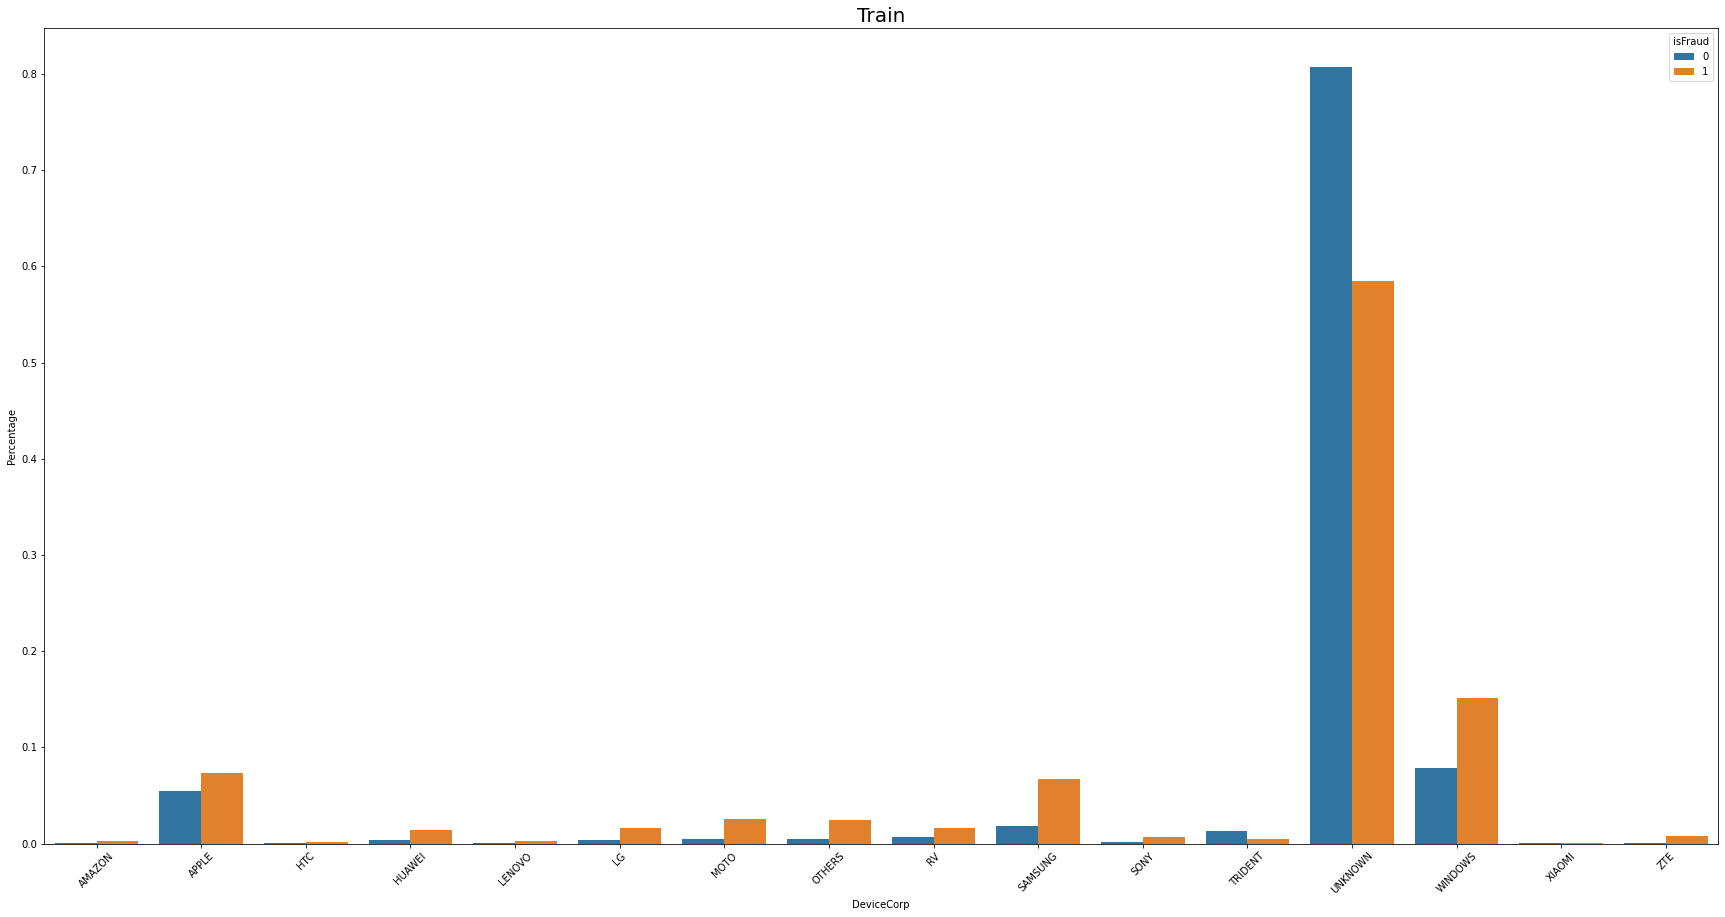

In [139]:
plt.figure(figsize = (30,15))
train_corp = train[~(train["DeviceCorp"].isnull())].groupby("isFraud")["DeviceCorp"].\
             value_counts(normalize =True).rename("Percentage")

train_corp = pd.DataFrame(train_corp).reset_index().sort_values("DeviceCorp")

sns.barplot(x = "DeviceCorp", y = "Percentage", hue = "isFraud" , data = train_corp)
plt.title("Train" , fontsize = 20)
plt.xticks(rotation = 45)
plt.show()


##  Feature Enginerring

In [140]:
train["Trans_min_mean"] = train["TransactionAmt"] - train["TransactionAmt"].mean()
test["Trans_min_mean"] = test["TransactionAmt"] - test["TransactionAmt"].mean()

train["Trans_min_std"] = train["Trans_min_mean"] / train["TransactionAmt"].std()
test["Trans_min_std"] = test["Trans_min_mean"] / test["TransactionAmt"].std()


train["TransactionAmt_to_mean_card1"]= \
                    train["TransactionAmt"]  / train.groupby(["card1"])["TransactionAmt"].transform("mean")

train["TransactionAmt_to_mean_card4"]= \
                    train["TransactionAmt"]  / train.groupby(["card4"])["TransactionAmt"].transform("mean")

train["TransactionAmt_to_std_card1"]= \
                    train["TransactionAmt"]  / train.groupby(["card1"])["TransactionAmt"].transform("std")

train["TransactionAmt_to_std_card4"]= \
                    train["TransactionAmt"]  / train.groupby(["card4"])["TransactionAmt"].transform("std")

test["TransactionAmt_to_mean_card1"]= \
                    test["TransactionAmt"]  / test.groupby(["card1"])["TransactionAmt"].transform("mean")

test["TransactionAmt_to_mean_card4"]= \
                    test["TransactionAmt"]  / test.groupby(["card4"])["TransactionAmt"].transform("mean")

test["TransactionAmt_to_std_card1"]= \
                    test["TransactionAmt"]  / test.groupby(["card1"])["TransactionAmt"].transform("std")

test["TransactionAmt_to_std_card4"]= \
                    test["TransactionAmt"]  / test.groupby(["card4"])["TransactionAmt"].transform("std")

In [141]:
train_missing = summary(train).iloc[:,[0,1,3]]
test_missing = summary(test).iloc[:,[0,1,3]]

In [142]:
print("Train Missing : {}".format(train_missing.shape[0]))
print("Test Missing : {}".format(test_missing.shape[0]))

Train Missing : 454
Test Missing : 453


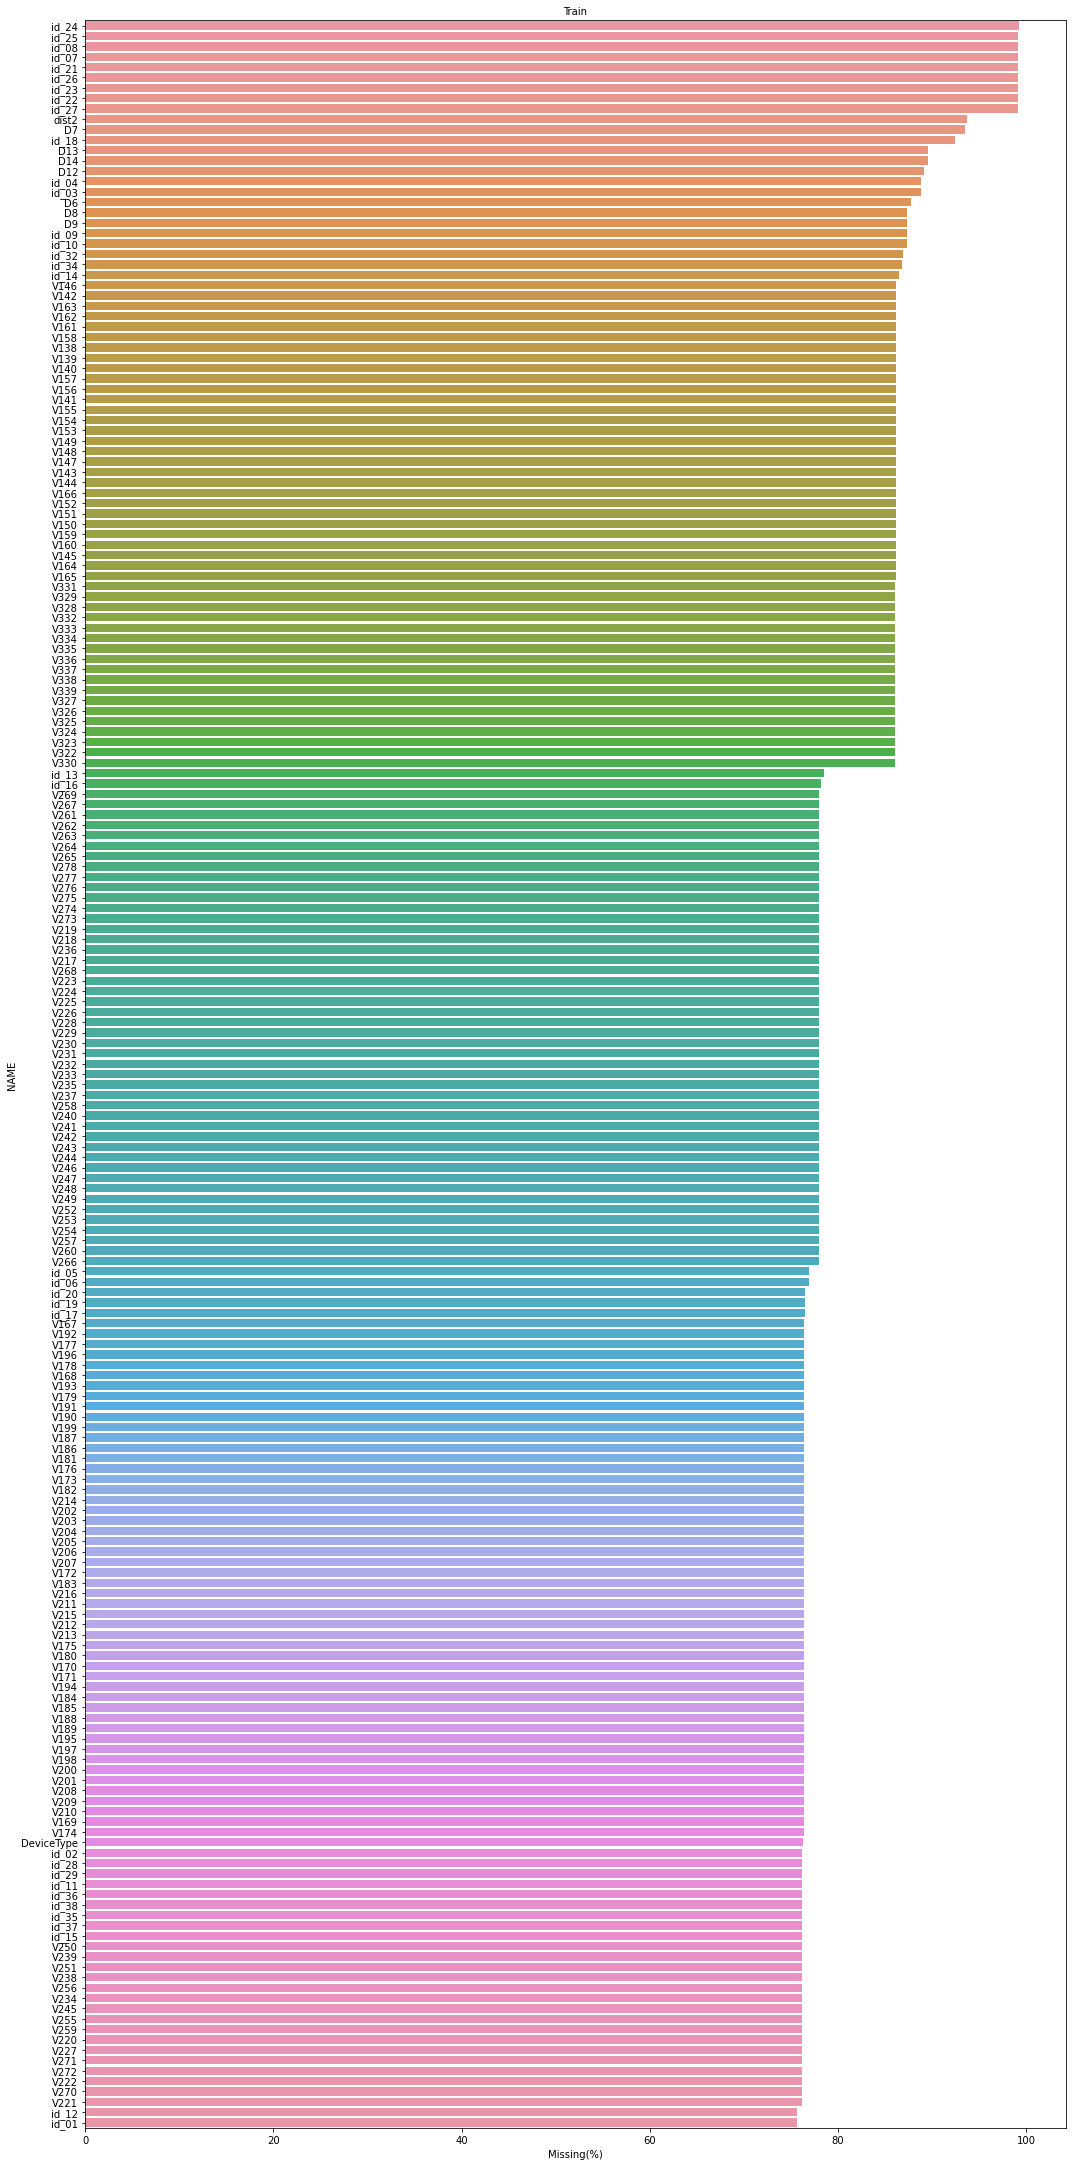

In [143]:
plt.figure(figsize =(15,30))
sns.barplot(y = "NAME" , x = "Missing(%)", data = train_missing[train_missing["Missing(%)"] > 70])
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.title("Train",fontsize=10)
plt.show()

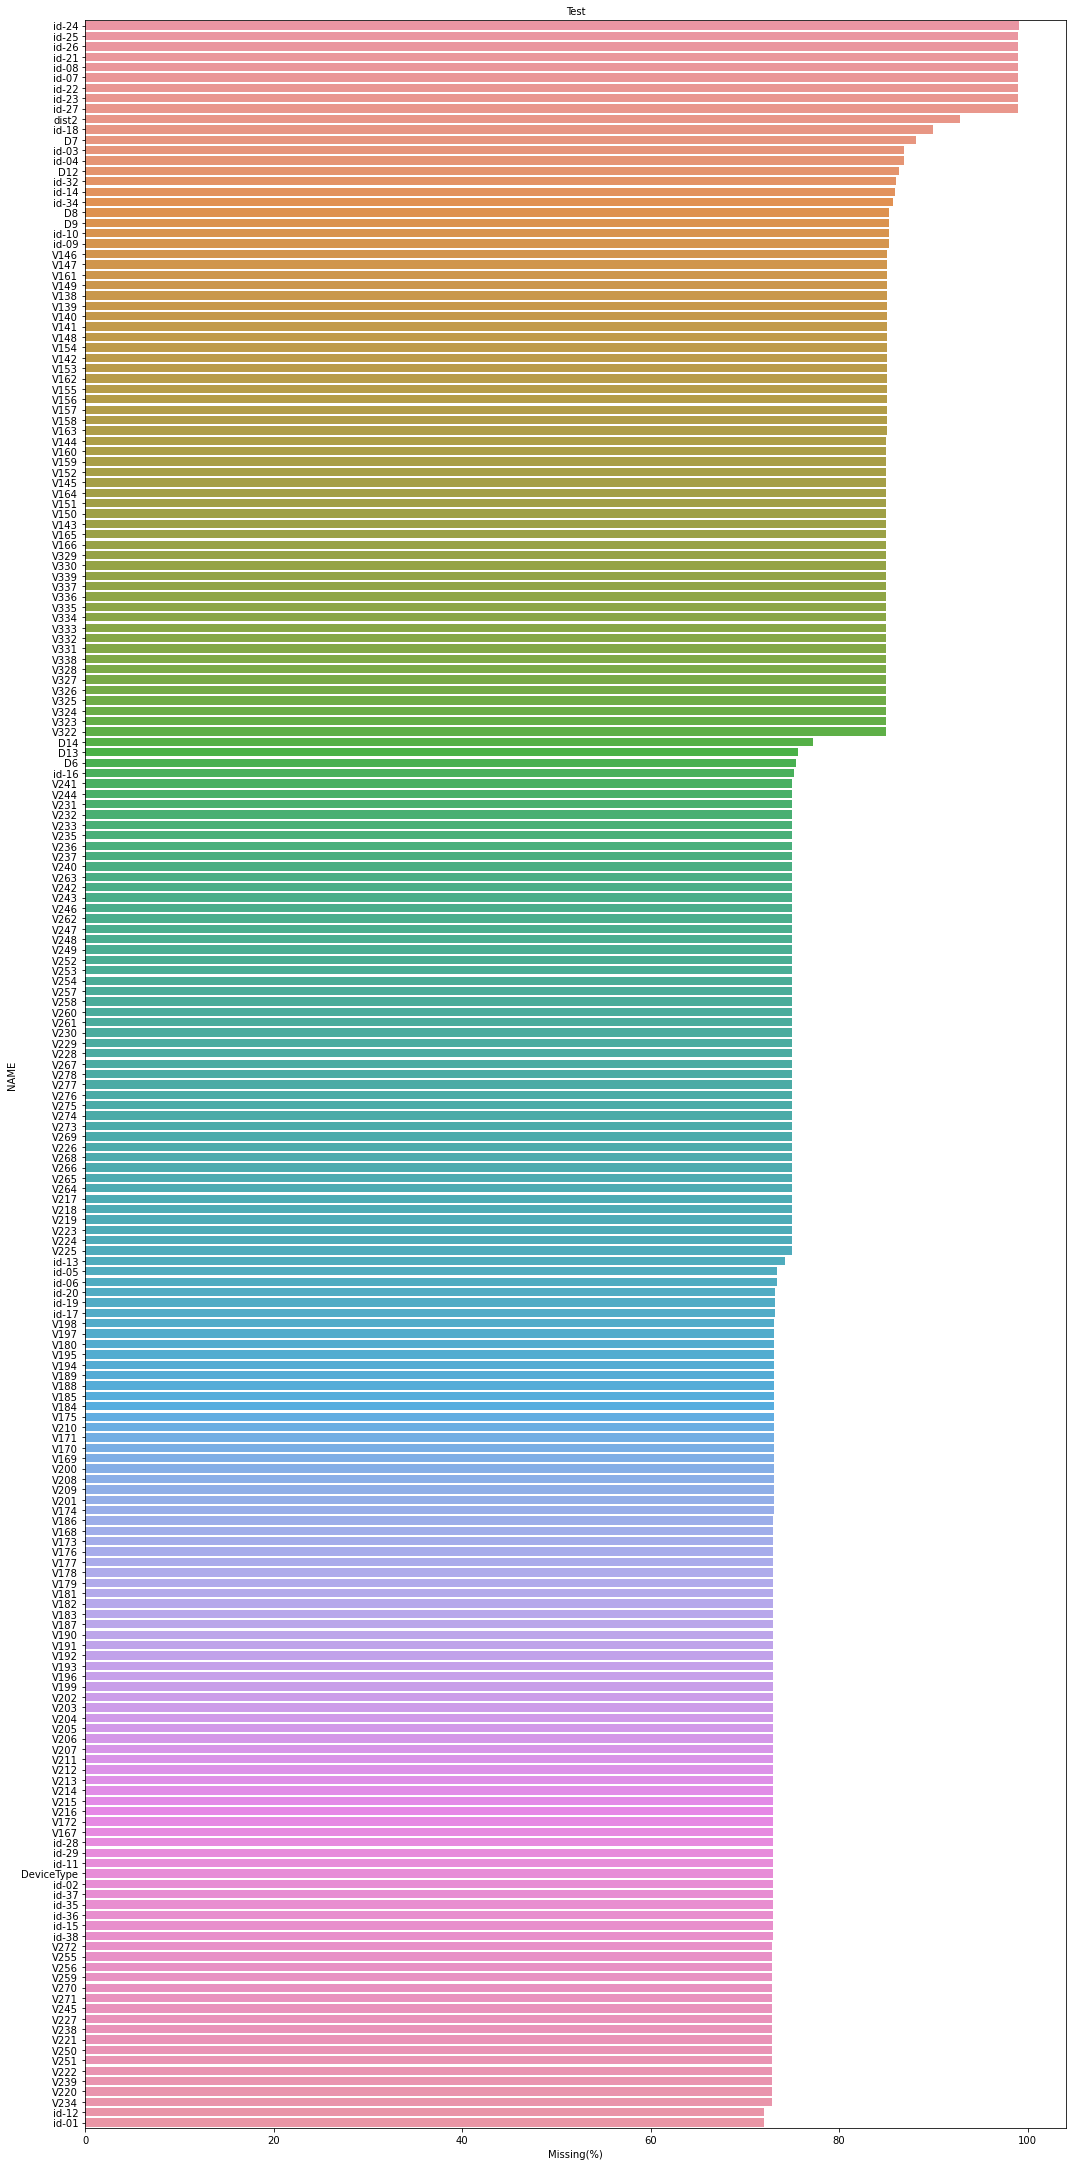

In [144]:
plt.figure(figsize =(15,30))
sns.barplot(y = "NAME" , x = "Missing(%)", data = test_missing[test_missing["Missing(%)"] > 70])
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.title("Test", fontsize = 10)
plt.show()

In [145]:
train_col = [col for col in train.columns if col != "isFraud"]
test.columns = train_col
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,day_risk,hours,hours_risk,LogTransactionAmt,Risk_Transaction,Risk_ProductCD,new_card3,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4
0,3663549,18403224,31.95000,W,10409,111.00000,150.00000,visa,226.00000,debit,170.00000,87.00000,1.00000,NaN,Google,UnKnown,6.00000,6.00000,0.00000,0.00000,3.00000,4.00000,0.00000,0.00000,6.00000,0.00000,5.00000,1.00000,115.00000,6.00000,419.00000,419.00000,27.00000,398.00000,27.00000,NaN,NaN,NaN,NaN,418.00000,203.00000,NaN,NaN,NaN,409.00000,T,T,F,NaN,NaN,F,T,T,T,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,47.95000,0.00000,0.00000,47.95000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [146]:
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

In [147]:
many_null_cols == many_null_cols_test

False

In [148]:
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [149]:
big_top_value_cols == big_top_value_cols_test

False

In [150]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,day_risk,hours,hours_risk,LogTransactionAmt,Risk_Transaction,Risk_ProductCD,new_card3,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4
0,2987000,0,86400,68.50000,W,13926,NaN,150.00000,discover,142.00000,credit,315.00000,87.00000,19.00000,NaN,UnKnown,UnKnown,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,2.00000,0.00000,1.00000,1.00000,14.00000,NaN,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,13.00000,13.00000,NaN,NaN,NaN,0.00000,T,T,T,M2,F,T,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,117.00000,0.00000,0.00000,0.00000,0.00000,0.00000,117.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [151]:
test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,day_risk,hours,hours_risk,LogTransactionAmt,Risk_Transaction,Risk_ProductCD,new_card3,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4
0,3663549,18403224,31.95000,W,10409,111.00000,150.00000,visa,226.00000,debit,170.00000,87.00000,1.00000,NaN,Google,UnKnown,6.00000,6.00000,0.00000,0.00000,3.00000,4.00000,0.00000,0.00000,6.00000,0.00000,5.00000,1.00000,115.00000,6.00000,419.00000,419.00000,27.00000,398.00000,27.00000,NaN,NaN,NaN,NaN,418.00000,203.00000,NaN,NaN,NaN,409.00000,T,T,F,NaN,NaN,F,T,T,T,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,47.95000,0.00000,0.00000,47.95000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [152]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test))
cols_to_drop.remove("isFraud")
len(cols_to_drop)

82

In [153]:
cols_to_drop

['V300',
 'V290',
 'id_24',
 'V55',
 'V68',
 'V108',
 'V284',
 'V305',
 'V111',
 'V121',
 'id_21',
 'V298',
 'V137',
 'V67',
 'V24',
 'V102',
 'id_08',
 'V135',
 'V88',
 'id_26',
 'V86',
 'V105',
 'V296',
 'V286',
 'V129',
 'V113',
 'V118',
 'V309',
 'id_07',
 'V293',
 'V133',
 'V25',
 'V301',
 'id_25',
 'V134',
 'V89',
 'V114',
 'V27',
 'V117',
 'V316',
 'V103',
 'V132',
 'V120',
 'V23',
 'V28',
 'V14',
 'V123',
 'V311',
 'V321',
 'V106',
 'id_27',
 'V319',
 'V110',
 'id_18',
 'V116',
 'V320',
 'V112',
 'C3',
 'V297',
 'V281',
 'V66',
 'V77',
 'V119',
 'new_card3',
 'V299',
 'V98',
 'V125',
 'V26',
 'V124',
 'V115',
 'V295',
 'V318',
 'V101',
 'V136',
 'V122',
 'id_23',
 'dist2',
 'id_22',
 'V65',
 'D7',
 'V109',
 'V104']

In [154]:
new_train = train.drop(cols_to_drop,axis = 1)
new_test = test.drop(cols_to_drop, axis = 1)

In [155]:
new_train.head(3)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V56,V57,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V79,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,day_risk,hours,hours_risk,LogTransactionAmt,Risk_Transaction,Risk_ProductCD,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4
0,2987000,0,86400,68.50000,W,13926,NaN,150.00000,discover,142.00000,credit,315.00000,87.00000,19.00000,UnKnown,UnKnown,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,2.00000,0.00000,1.00000,1.00000,14.00000,NaN,13.00000,NaN,NaN,NaN,NaN,NaN,13.00000,13.00000,NaN,NaN,NaN,0.00000,T,T,T,M2,F,T,NaN,NaN,NaN,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,117.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,117.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,117.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,unknownxunknown,NaN,NaN,NaN,NaN,NaN,NaN,UnKnown,1,HighRiskDays,1,LowRiskHours,4.22683,LowRiks,Hi

In [156]:
new_test.head(3)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V56,V57,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V79,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,day_risk,hours,hours_risk,LogTransactionAmt,Risk_Transaction,Risk_ProductCD,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4
0,3663549,18403224,31.95000,W,10409,111.00000,150.00000,visa,226.00000,debit,170.00000,87.00000,1.00000,Google,UnKnown,6.00000,6.00000,0.00000,3.00000,4.00000,0.00000,0.00000,6.00000,0.00000,5.00000,1.00000,115.00000,6.00000,419.00000,419.00000,27.00000,398.00000,27.00000,NaN,NaN,NaN,418.00000,203.00000,NaN,NaN,NaN,409.00000,T,T,F,NaN,NaN,F,T,T,T,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,47.95000,0.00000,47.95000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,47.95000,0.00000,47.95000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,unknownxunkno

In [157]:
cat_cols = [col for col in new_train if new_train[col].dtype == "object"]
len(cat_cols)

40

In [158]:
id_list = ["id_0"+ str(i) for i in range(1,9)]
id_list = id_list + ["id_" + str(i) for i in range(10,39) ]

for id_i in id_list:
    dtype = train[id_i].dtype
    
    if dtype == "object":
        print(id_i , "--- > ", train[id_i].unique())

id_12 --- >  [nan 'NotFound' 'Found']
id_15 --- >  [nan 'New' 'Found' 'Unknown']
id_16 --- >  [nan 'NotFound' 'Found']
id_23 --- >  [nan 'IP_PROXY:TRANSPARENT' 'IP_PROXY:ANONYMOUS' 'IP_PROXY:HIDDEN']
id_27 --- >  [nan 'Found' 'NotFound']
id_28 --- >  [nan 'New' 'Found']
id_29 --- >  [nan 'NotFound' 'Found']
id_30 --- >  ['unknown' 'Android 7.0' 'iOS 11.1.2' 'Mac OS X 10_11_6' 'Windows 10'
 'Android' 'Linux' 'iOS 11.0.3' 'Mac OS X 10_7_5' 'Mac OS X 10_12_6'
 'Mac OS X 10_13_1' 'iOS 11.1.0' 'Mac OS X 10_9_5' 'Windows 7'
 'Windows 8.1' 'Mac' 'iOS 10.3.3' 'Mac OS X 10.12' 'Mac OS X 10_10_5'
 'Mac OS X 10_11_5' 'iOS 9.3.5' 'Android 5.1.1' 'Android 7.1.1'
 'Android 6.0' 'iOS 10.3.1' 'Mac OS X 10.9' 'iOS 11.1.1' 'Windows Vista'
 'iOS 10.3.2' 'iOS 11.0.2' 'Mac OS X 10.11' 'Android 8.0.0' 'iOS 10.2.0'
 'iOS 10.2.1' 'iOS 11.0.0' 'Mac OS X 10.10' 'Mac OS X 10_12_3'
 'Mac OS X 10_12' 'Android 6.0.1' 'iOS' 'Mac OS X 10.13'
 'Mac OS X 10_12_5' 'Mac OS X 10_8_5' 'iOS 11.0.1' 'iOS 10.0.2'
 'Android 5.

In [159]:
cat_cols

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'day_risk',
 'hours_risk',
 'Risk_Transaction',
 'Risk_ProductCD',
 'OS_id_30',
 'Version_id_30',
 'Browser_id_31',
 'Version_id_31',
 'Width_id_33',
 'Height_id_33',
 'DeviceCorp']

In [160]:
#cat = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17',  'id_19', 'id_20','id_28', 'id_29',
#       'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36','id_37', 'id_38', 
#       'DeviceType', 'DeviceInfo', 'ProductCD',
#       'card4', 'card6', 'M4','P_emaildomain','R_emaildomain',
#       'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 
#       'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']

#len(cat)

In [161]:
#all_cat = list(set(cat + cat_cols))
#len(all_cat)

all_cat = cat_cols
len(all_cat)

40

In [162]:
def labelencoder(data):

    from sklearn.preprocessing import LabelEncoder

    for col in all_cat:
        le = LabelEncoder()
        data[col] = le.fit_transform(list(data[col].astype(str).values))
        
    #return data

In [163]:
labelencoder(new_train)
labelencoder(new_test)

In [164]:
all_cat

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo',
 'day_risk',
 'hours_risk',
 'Risk_Transaction',
 'Risk_ProductCD',
 'OS_id_30',
 'Version_id_30',
 'Browser_id_31',
 'Version_id_31',
 'Width_id_33',
 'Height_id_33',
 'DeviceCorp']

In [165]:
new_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V56,V57,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V79,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,day_risk,hours,hours_risk,LogTransactionAmt,Risk_Transaction,Risk_ProductCD,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4
0,2987000,0,86400,68.50000,4,13926,NaN,150.00000,1,142.00000,1,315.00000,87.00000,19.00000,4,4,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,2.00000,0.00000,1.00000,1.00000,14.00000,NaN,13.00000,NaN,NaN,NaN,NaN,NaN,13.00000,13.00000,NaN,NaN,NaN,0.00000,1,1,1,2,0,1,2,2,2,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,117.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,117.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,117.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,2,2,75,129,NaN,260,4,2,2,2,2,2,1555,1,0,1,1,4.22683,1,0,8,0,38,45,155,138,12,-66.49306,-0.28664,0.19464,0.25776,0.18457,0.17022
1,2987001,0,86401,29.00000,4,2755

In [166]:
new_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,V16,V17,V18,V19,V20,V21,V22,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V56,V57,V58,V59,V60,V61,V62,V63,V64,V69,V70,V71,V72,V73,V74,V75,V76,V78,V79,V80,V81,V82,V83,V84,V85,V87,V90,V91,V92,V93,V94,V95,V96,V97,V99,V100,V126,V127,V128,V130,V131,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V282,V283,V285,V287,V288,V289,V291,V292,V294,V302,V303,V304,V306,V307,V308,V310,V312,V313,V314,V315,V317,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,day,day_risk,hours,hours_risk,LogTransactionAmt,Risk_Transaction,Risk_ProductCD,OS_id_30,Version_id_30,Browser_id_31,Version_id_31,Width_id_33,Height_id_33,DeviceCorp,Trans_min_mean,Trans_min_std,TransactionAmt_to_mean_card1,TransactionAmt_to_mean_card4,TransactionAmt_to_std_card1,TransactionAmt_to_std_card4
0,3663549,18403224,31.95000,4,10409,111.00000,150.00000,4,226.00000,2,170.00000,87.00000,1.00000,1,4,6.00000,6.00000,0.00000,3.00000,4.00000,0.00000,0.00000,6.00000,0.00000,5.00000,1.00000,115.00000,6.00000,419.00000,419.00000,27.00000,398.00000,27.00000,NaN,NaN,NaN,418.00000,203.00000,NaN,NaN,NaN,409.00000,1,1,0,3,2,0,1,1,1,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,47.95000,0.00000,47.95000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,47.95000,0.00000,47.95000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,3,2,NaN,NaN,NaN,2,2,86,135,NaN,390,2,2,2,2,2,2,1986,3,1,1,1,3.46417,1,0,8,0,16,50,210

In [167]:
def inf_control(data):
    
    liste = []
    
    for col in data.columns:
        
        positive_inf = data[data[col] == np.inf][col].count()
        negative_inf = data[data[col] == -np.inf][col].count()
        
        if positive_inf > 0 or negative_inf > 0:
            
            print(f"{col} : \n\nNegative_Inf : {negative_inf}, Positive_Inf : {positive_inf}")
            liste.append(col)
            
        
    if len(liste) == 0:
        
        print("Inf Bir Değer Yok !!!!")

In [168]:
inf_control(new_test)

TransactionAmt_to_std_card1 : 

Negative_Inf : 0, Positive_Inf : 1538


In [169]:
inf_control(new_train)

TransactionAmt_to_std_card1 : 

Negative_Inf : 0, Positive_Inf : 1444


In [170]:
def clean_inf_nan(data):
    
    data.replace([np.inf , -np.inf], np.nan,inplace = True)

In [171]:
clean_inf_nan(new_train)
clean_inf_nan(new_test)

In [172]:
inf_control(new_train)

Inf Bir Değer Yok !!!!


In [173]:
inf_control(new_test)

Inf Bir Değer Yok !!!!


In [174]:
# Boş Olan Değerleri Kontrol Etmek İstedim Ona Göre Bir Doldurma yapacağım !!!


na_train = new_train.isnull().sum()
na_index_train = na_train[na_train > 0].index

na_test = new_test.isnull().sum()
na_index_test = na_test[na_test > 0].index

In [175]:
for i in na_index_train:
    print(i , "-- >" , new_train[i].dtype)

card2 -- > float64
card3 -- > float64
card5 -- > float64
addr1 -- > float64
addr2 -- > float64
dist1 -- > float64
D1 -- > float64
D2 -- > float64
D3 -- > float64
D4 -- > float64
D5 -- > float64
D6 -- > float64
D8 -- > float64
D9 -- > float64
D10 -- > float64
D11 -- > float64
D12 -- > float64
D13 -- > float64
D14 -- > float64
D15 -- > float64
V1 -- > float64
V2 -- > float64
V3 -- > float64
V4 -- > float64
V5 -- > float64
V6 -- > float64
V7 -- > float64
V8 -- > float64
V9 -- > float64
V10 -- > float64
V11 -- > float64
V12 -- > float64
V13 -- > float64
V15 -- > float64
V16 -- > float64
V17 -- > float64
V18 -- > float64
V19 -- > float64
V20 -- > float64
V21 -- > float64
V22 -- > float64
V29 -- > float64
V30 -- > float64
V31 -- > float64
V32 -- > float64
V33 -- > float64
V34 -- > float64
V35 -- > float64
V36 -- > float64
V37 -- > float64
V38 -- > float64
V39 -- > float64
V40 -- > float64
V41 -- > float64
V42 -- > float64
V43 -- > float64
V44 -- > float64
V45 -- > float64
V46 -- > float64
V4

In [176]:
for i in na_index_test:
    print(i , "-- >" , new_test[i].dtype)

card2 -- > float64
card3 -- > float64
card5 -- > float64
addr1 -- > float64
addr2 -- > float64
dist1 -- > float64
C1 -- > float64
C2 -- > float64
C4 -- > float64
C5 -- > float64
C6 -- > float64
C7 -- > float64
C8 -- > float64
C9 -- > float64
C10 -- > float64
C11 -- > float64
C12 -- > float64
C13 -- > float64
C14 -- > float64
D1 -- > float64
D2 -- > float64
D3 -- > float64
D4 -- > float64
D5 -- > float64
D6 -- > float64
D8 -- > float64
D9 -- > float64
D10 -- > float64
D11 -- > float64
D12 -- > float64
D13 -- > float64
D14 -- > float64
D15 -- > float64
V1 -- > float64
V2 -- > float64
V3 -- > float64
V4 -- > float64
V5 -- > float64
V6 -- > float64
V7 -- > float64
V8 -- > float64
V9 -- > float64
V10 -- > float64
V11 -- > float64
V12 -- > float64
V13 -- > float64
V15 -- > float64
V16 -- > float64
V17 -- > float64
V18 -- > float64
V19 -- > float64
V20 -- > float64
V21 -- > float64
V22 -- > float64
V29 -- > float64
V30 -- > float64
V31 -- > float64
V32 -- > float64
V33 -- > float64
V34 -- > f

In [177]:
def median_number(data,na_cols):
    for col in na_cols:
        median = data[col].median()
        data[col].fillna(median, inplace = True)
        
    #return data

In [178]:
#new_train = median_number(new_train,na_index_train)
median_number(new_train,na_index_train)

In [179]:
#new_test = median_number(new_test,na_index_test)
median_number(new_test,na_index_test)

In [180]:
summary(new_train)["Missing(%)"].max(),summary(new_test)["Missing(%)"].max()

(0.0, 0.0)

In [181]:
#new_train.head()

In [182]:
#new_test.head()

## Reduce Data

In [183]:
def reduce_mem_usage2(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [184]:
#new_train.to_csv("/Users/gokhanersoz/Desktop/Project/train.csv")
#new_test.to_csv("/Users/gokhanersoz/Desktop/Project/test.csv")

In [185]:
new_reduced_train = reduce_mem_usage2(new_train)
new_reduced_test = reduce_mem_usage2(new_test)

Memory usage of dataframe is 1679.04 MB
Memory usage after optimization is: 442.27 MB
Decreased by 73.7%
Memory usage of dataframe is 1438.06 MB
Memory usage after optimization is: 387.06 MB
Decreased by 73.1%


In [188]:
new_reduced_train.to_csv("/Users/gokhanersoz/Desktop/Project/reduced_train.csv")
new_reduced_test.to_csv("/Users/gokhanersoz/Desktop/Project/reduced_test.csv")